## Анализ морфологии

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display

### Загрузка данных

In [2]:
data=pd.read_excel("./data/morph.xlsx", sheet_name="Индивидуальная изм-ть", skiprows=2)

In [3]:
data.head()

,Sp,Region,PLANT_CODE,POPUL_CODE,LAT,LON,ALT,IC,PN,WK,...,Dpl/Lp,Ср.зн S2p3l-S2p4l,Dp,Dvl,Dnl,Dc,Dvns,Dnns,Dvvs,Dnvs
0,Df,Magadanskaya_Mal,A1,MC2,60.38252,151.28287,1000,39.448826,157.45163,11.136081,...,0.356234,0.40,0.3,0.3,0.3,0.3,0.3,0.3,0.1,0.3
1,Df,Magadanskaya_Mal,A2,MC2,60.38252,151.28287,1000,39.448826,157.45163,11.136081,...,0.275556,0.24,0.3,0.3,0.3,0.3,0.3,0.3,0.1,0.3
2,Df,Magadanskaya_Mal,A3,MC2,60.38252,151.28287,1000,39.448826,157.45163,11.136081,...,0.273902,0.34,0.3,0.3,0.3,0.3,0.3,0.3,0.1,0.3
3,Df,Magadanskaya_Mal,A4,MC2,60.38252,151.28287,1000,39.448826,157.45163,11.136081,...,0.355114,0.35,0.3,0.3,0.3,0.3,0.3,0.3,0.1,0.3
4,Df,Magadanskaya_Mal,A5,MC2,60.38252,151.28287,1000,39.448826,157.45163,11.136081,...,0.316384,0.43,0.3,0.3,0.3,0.3,0.3,0.3,0.1,0.3


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sp                 1040 non-null   object 
 1   Region             1040 non-null   object 
 2   PLANT_CODE         1040 non-null   object 
 3   POPUL_CODE         1040 non-null   object 
 4   LAT                1040 non-null   float64
 5   LON                1040 non-null   float64
 6   ALT                1040 non-null   int64  
 7   IC                 1040 non-null   float64
 8   PN                 1040 non-null   float64
 9   WK                 1040 non-null   float64
 10  CK                 1040 non-null   float64
 11  IOE                1040 non-null   float64
 12  Ann_PREC           1040 non-null   float64
 13  T                  1040 non-null   float64
 14  U                  1040 non-null   int64  
 15  R                  1040 non-null   int64  
 16  S                  1040 

Уникальность индивидуальных кодов, подсчет количества популяционных кодов

In [5]:
data.POPUL_CODE.value_counts()

MC2     20
YC3     20
AC31    20
AC32    20
AC33    20
AC34    20
AC35    20
AC36    20
AC37    20
AC38    20
AC39    20
AC40    20
AC41    20
JC42    20
JC43    20
KC44    20
KC45    20
KC46    20
KC47    20
PC49    20
SC59    20
SC60    20
SC61    20
SC62    20
KC63    20
AC30    20
AC29    20
AC28    20
BC14    20
YC4     20
YC5     20
YC6     20
YC7     20
YC8     20
YC9     20
IC10    20
IC11    20
BC12    20
BC13    20
BC15    20
AC27    20
ZC17    20
ZC18    20
ZC19    20
ZC20    20
ZC21    20
AC22    20
AC23    20
AC24    20
AC25    20
AC26    20
KC64    20
Name: POPUL_CODE, dtype: int64

In [6]:
data.Region.value_counts()

Magadanskaya_Mal     20
Yakutiya_Tim         20
Amurskaya_Sco        20
Amurskaya_BN         20
Amurskaya_Gon        20
Amurskaya_Mad        20
Amurskaya_BO         20
Amurskaya_ChKh       20
Amurskaya_Mag        20
Amurskaya_T-M        20
Amurskaya_Tyg        20
Amurskaya_Bur        20
Amurskaya_Pis        20
Jewish_Sol           20
Jewish_Kul           20
Khabarovskiy_Yar     20
Khabarovskiy_DBag    20
Khabarovskiy_SBag    20
Khabarovskiy_Vys     20
Primorskiy_Ol        20
Sakhalinskaya_Mag    20
Sakhalinskaya_Gor    20
Sakhalinskaya_Mal    20
Sakhalinskaya_Otr    20
Kamchatskaya _Av     20
Amurskaya_Tah        20
Amurskaya_Uru        20
Amurskaya_Erf        20
Buraytiya_Ikhe       20
Yakutiya_Ber         20
Yakutiya_BKh         20
Yakutiya_MNim        20
Yakutiya_MKur        20
Yakutiya_Tom         20
Yakutiya_Tekh        20
Irkutskaya_Usch      20
Irkutskaya_Gol       20
Buraytiya_Mar        20
Buraytiya_Ir         20
Buraytiya_Tab        20
Amurskaya_Ign        20
Zabaykalskiy_Kab

Разграничение признаков по типу: морфология, климат, количественные/качетсвенные

In [7]:
climate = ['IC', 'PN', 'WK', 'CK', 'IOE', 'Ann_PREC', 'T', 'U', 'R', 'S']
morph_quant = ['Lkd','Wkd', 'Dvsh', 'Dosh', 'L1p1l', 'Dpl', 'Lp', 'S2p3l', 'S2p4l',
'Wkd/Lkd', 'Dvsh/Dosh', 'Lkd/L1p1l', 'Dpl/Lp', 'Ср.зн S2p3l-S2p4l']  # количесвтенные морфологические признаки
morph_qual = ['Dp','Dvl', 'Dnl', 'Dc', 'Dvns', 'Dnns', 'Dvvs', 'Dnvs'] # качетсвенные морфологические признаки


#### Финальная подготовка данных, подсчет пропущенных значений (если таковые имеются), заполнение их медианными значениями


In [8]:
pd.isnull(data).sum()

Sp                   0
Region               0
PLANT_CODE           0
POPUL_CODE           0
LAT                  0
LON                  0
ALT                  0
IC                   0
PN                   0
WK                   0
CK                   0
IOE                  0
Ann_PREC             0
T                    0
U                    0
R                    0
S                    0
Lkd                  0
Wkd                  0
Dvsh                 0
Dosh                 0
L1p1l                0
Dpl                  0
Lp                   0
S2p3l                0
S2p4l                0
Wkd/Lkd              0
Dvsh/Dosh            0
Lkd/L1p1l            0
Dpl/Lp               0
Ср.зн S2p3l-S2p4l    0
Dp                   0
Dvl                  0
Dnl                  1
Dc                   0
Dvns                 0
Dnns                 0
Dvvs                 0
Dnvs                 0
dtype: int64

Таким образом, во всей базе данных у нас пропущено лишь одно значение Dnl, ну ничего страшного, если мы его заполним просто предыдущим значением и все. 

In [9]:
data.fillna(method='bfill', inplace=True)
pd.isnull(data).sum()

Sp                   0
Region               0
PLANT_CODE           0
POPUL_CODE           0
LAT                  0
LON                  0
ALT                  0
IC                   0
PN                   0
WK                   0
CK                   0
IOE                  0
Ann_PREC             0
T                    0
U                    0
R                    0
S                    0
Lkd                  0
Wkd                  0
Dvsh                 0
Dosh                 0
L1p1l                0
Dpl                  0
Lp                   0
S2p3l                0
S2p4l                0
Wkd/Lkd              0
Dvsh/Dosh            0
Lkd/L1p1l            0
Dpl/Lp               0
Ср.зн S2p3l-S2p4l    0
Dp                   0
Dvl                  0
Dnl                  0
Dc                   0
Dvns                 0
Dnns                 0
Dvvs                 0
Dnvs                 0
dtype: int64

Все больше пропущенных значений в базе нет, можно проводить различные виды анализа...

#### Дисперсионный анализ по количественным признакам

Performing Kruskall-Wallis test for: Lkd
KruskalResult(statistic=530.3589607009745, pvalue=5.796387451696896e-81)


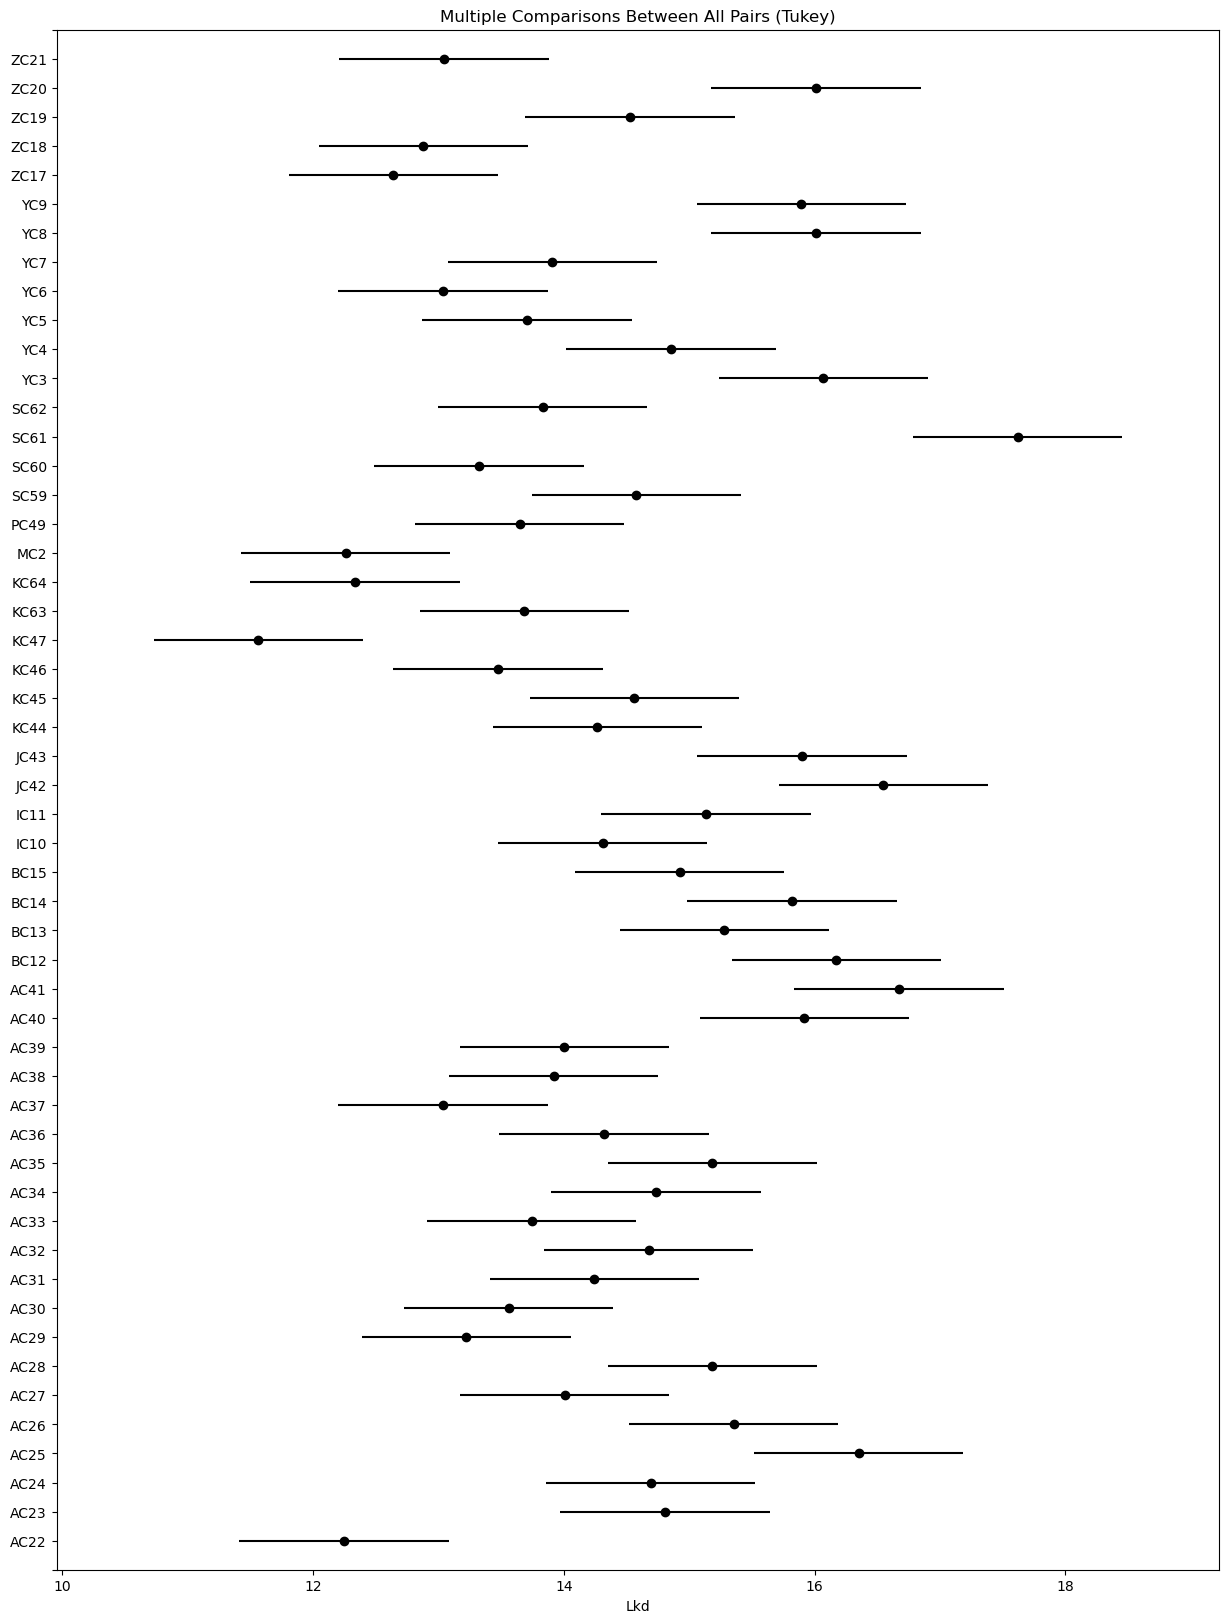

Performing Kruskall-Wallis test for: Wkd
KruskalResult(statistic=495.98351396543745, pvalue=3.293983347656173e-74)


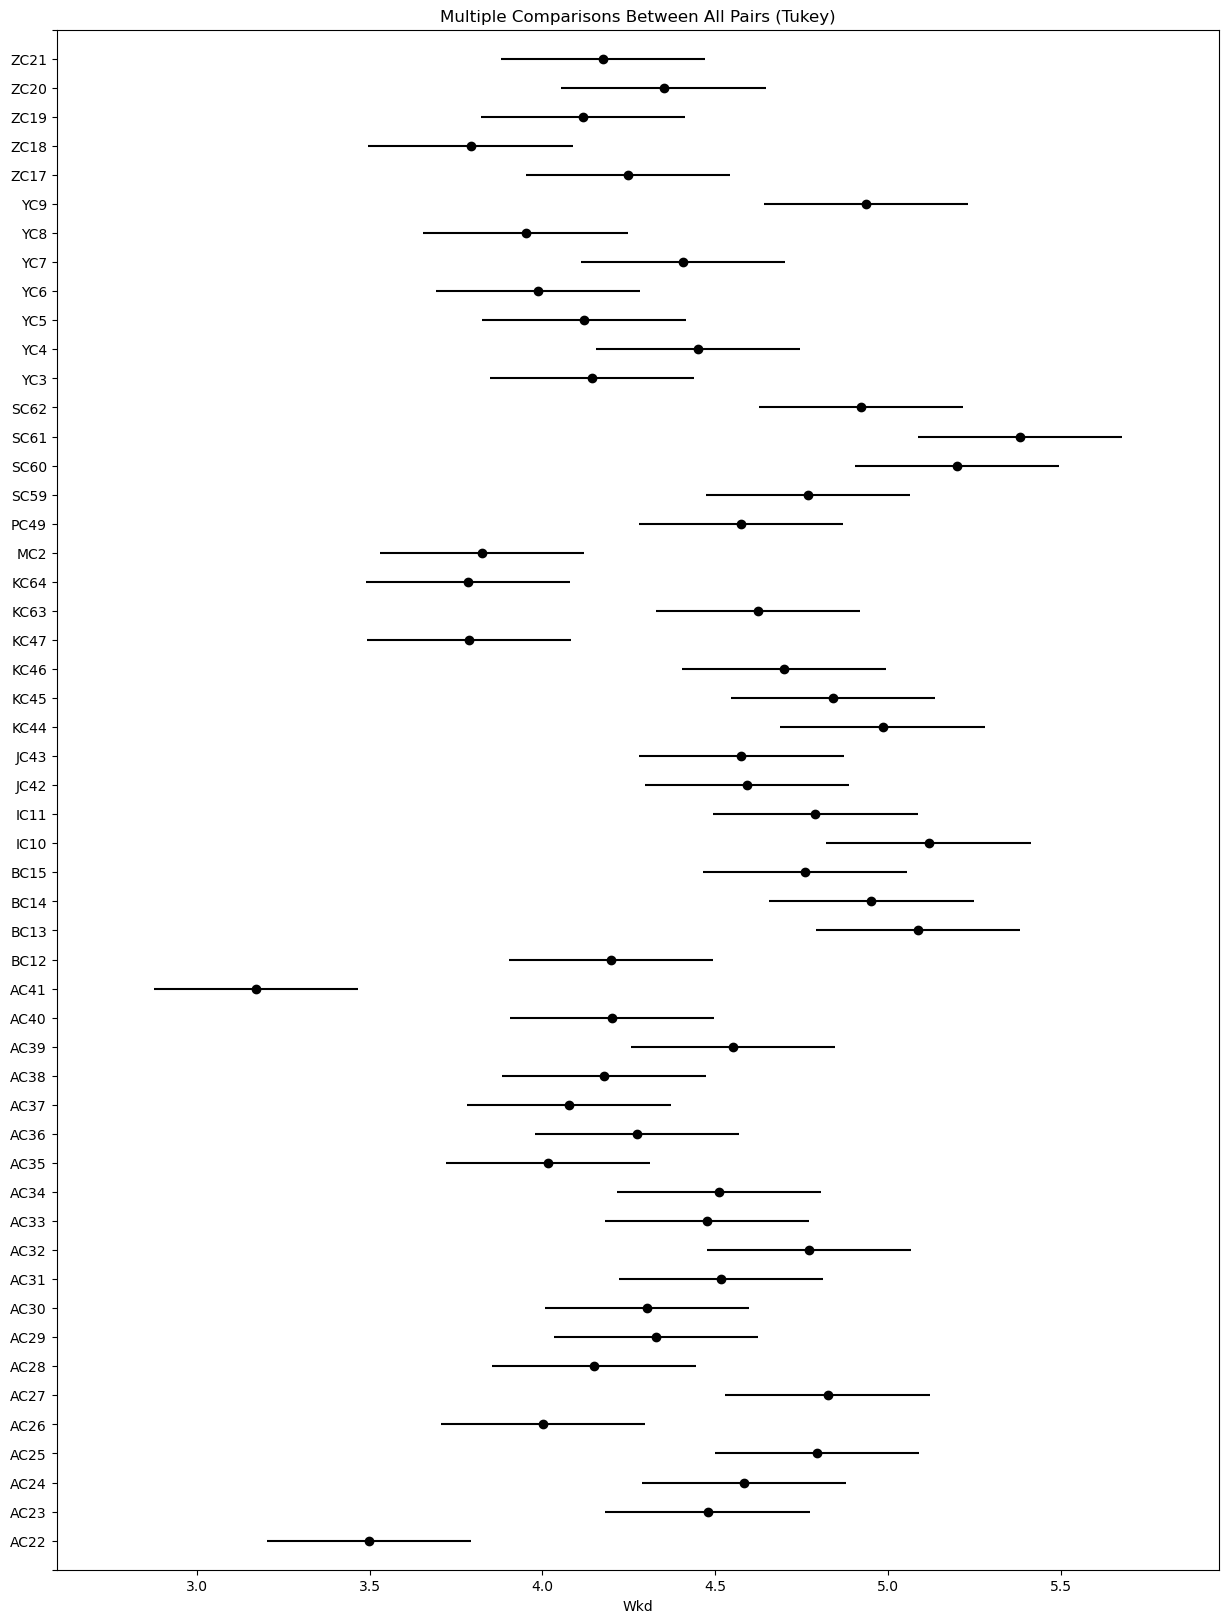

Performing Kruskall-Wallis test for: Dvsh
KruskalResult(statistic=675.9390643844919, pvalue=5.27554633921205e-110)


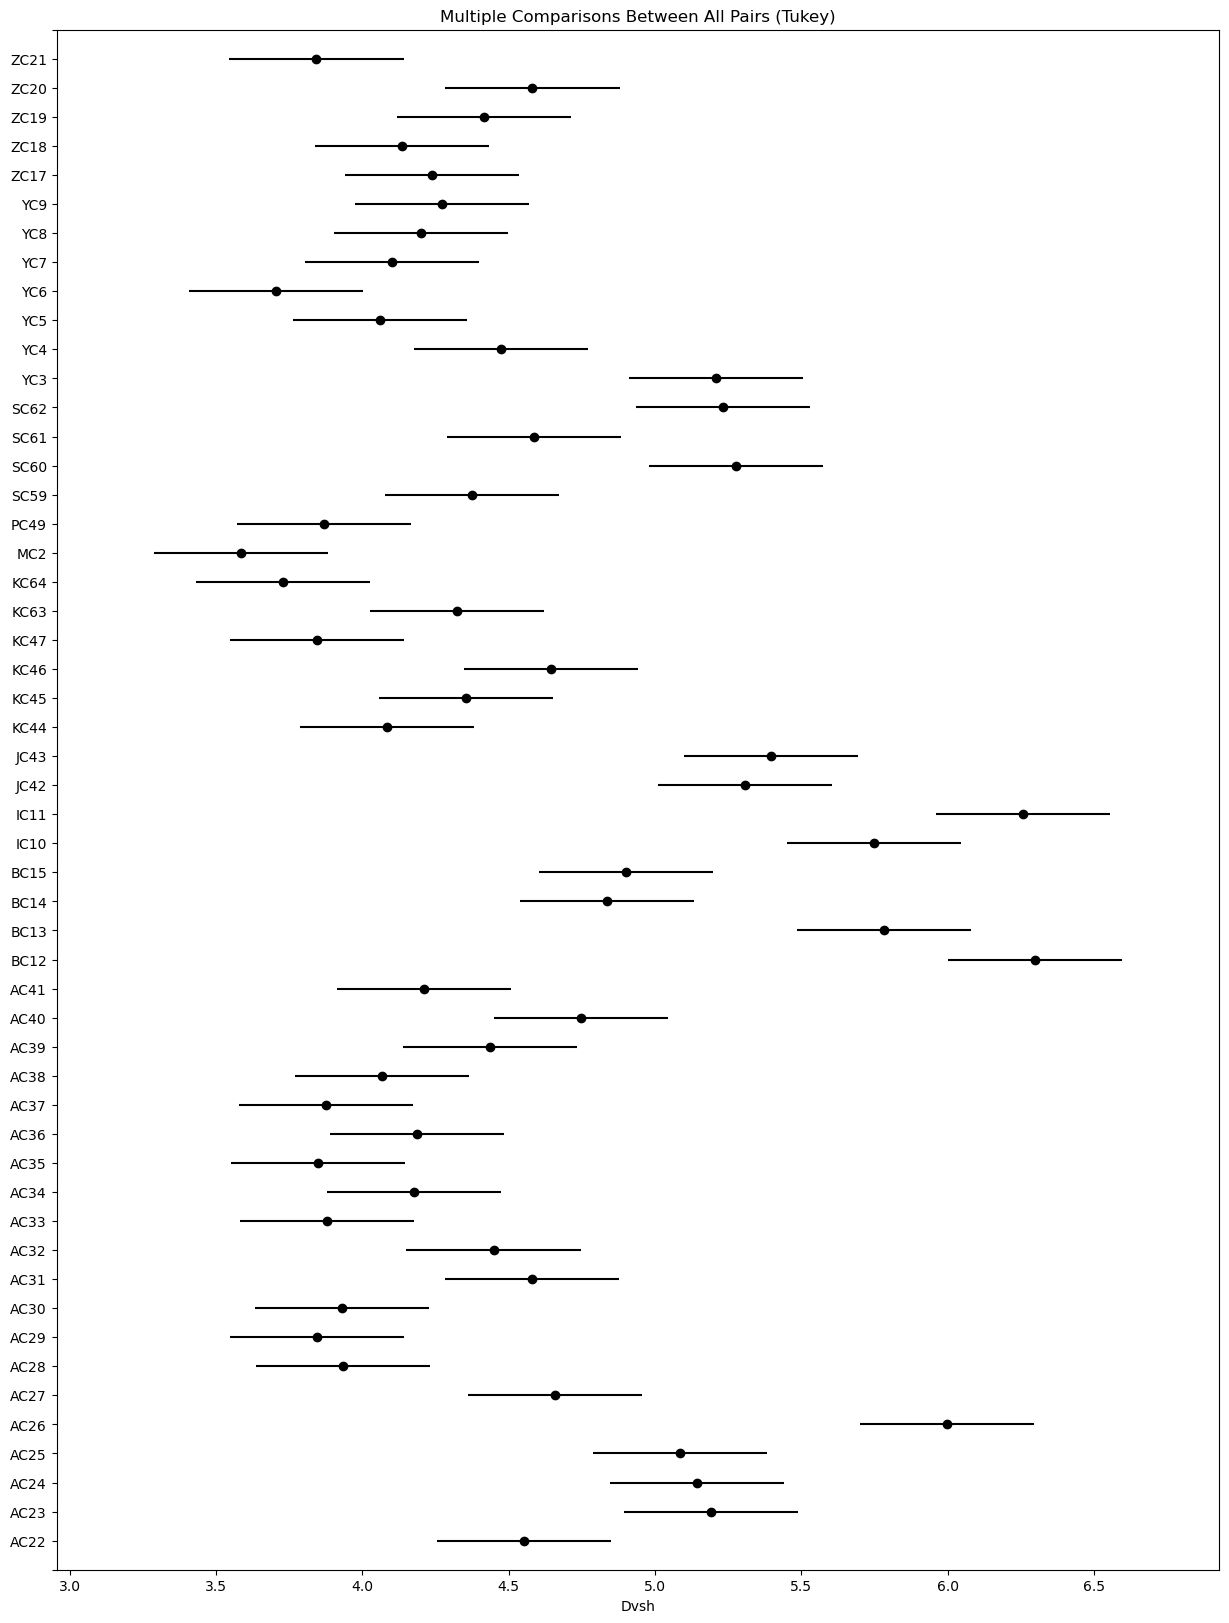

Performing Kruskall-Wallis test for: Dosh
KruskalResult(statistic=581.108562847292, pvalue=5.146960485624122e-91)


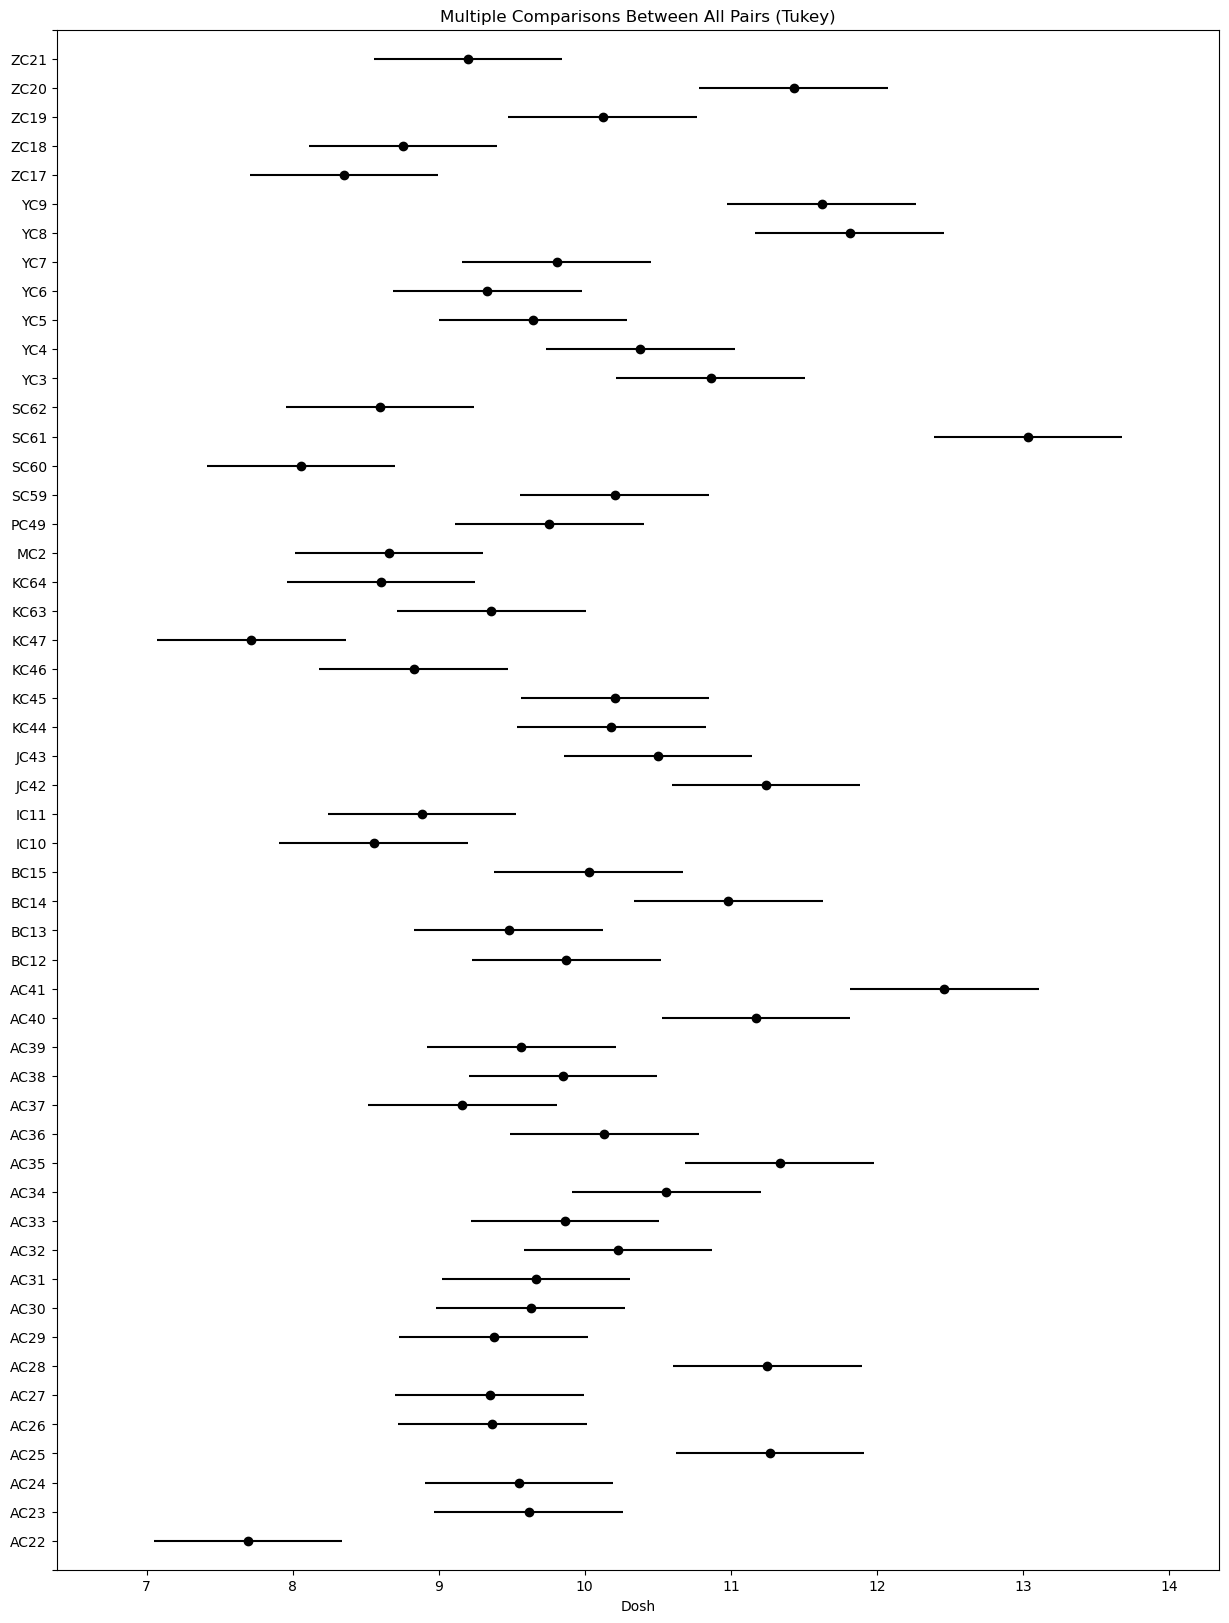

Performing Kruskall-Wallis test for: L1p1l
KruskalResult(statistic=486.89821421428474, pvalue=1.971231802726549e-72)


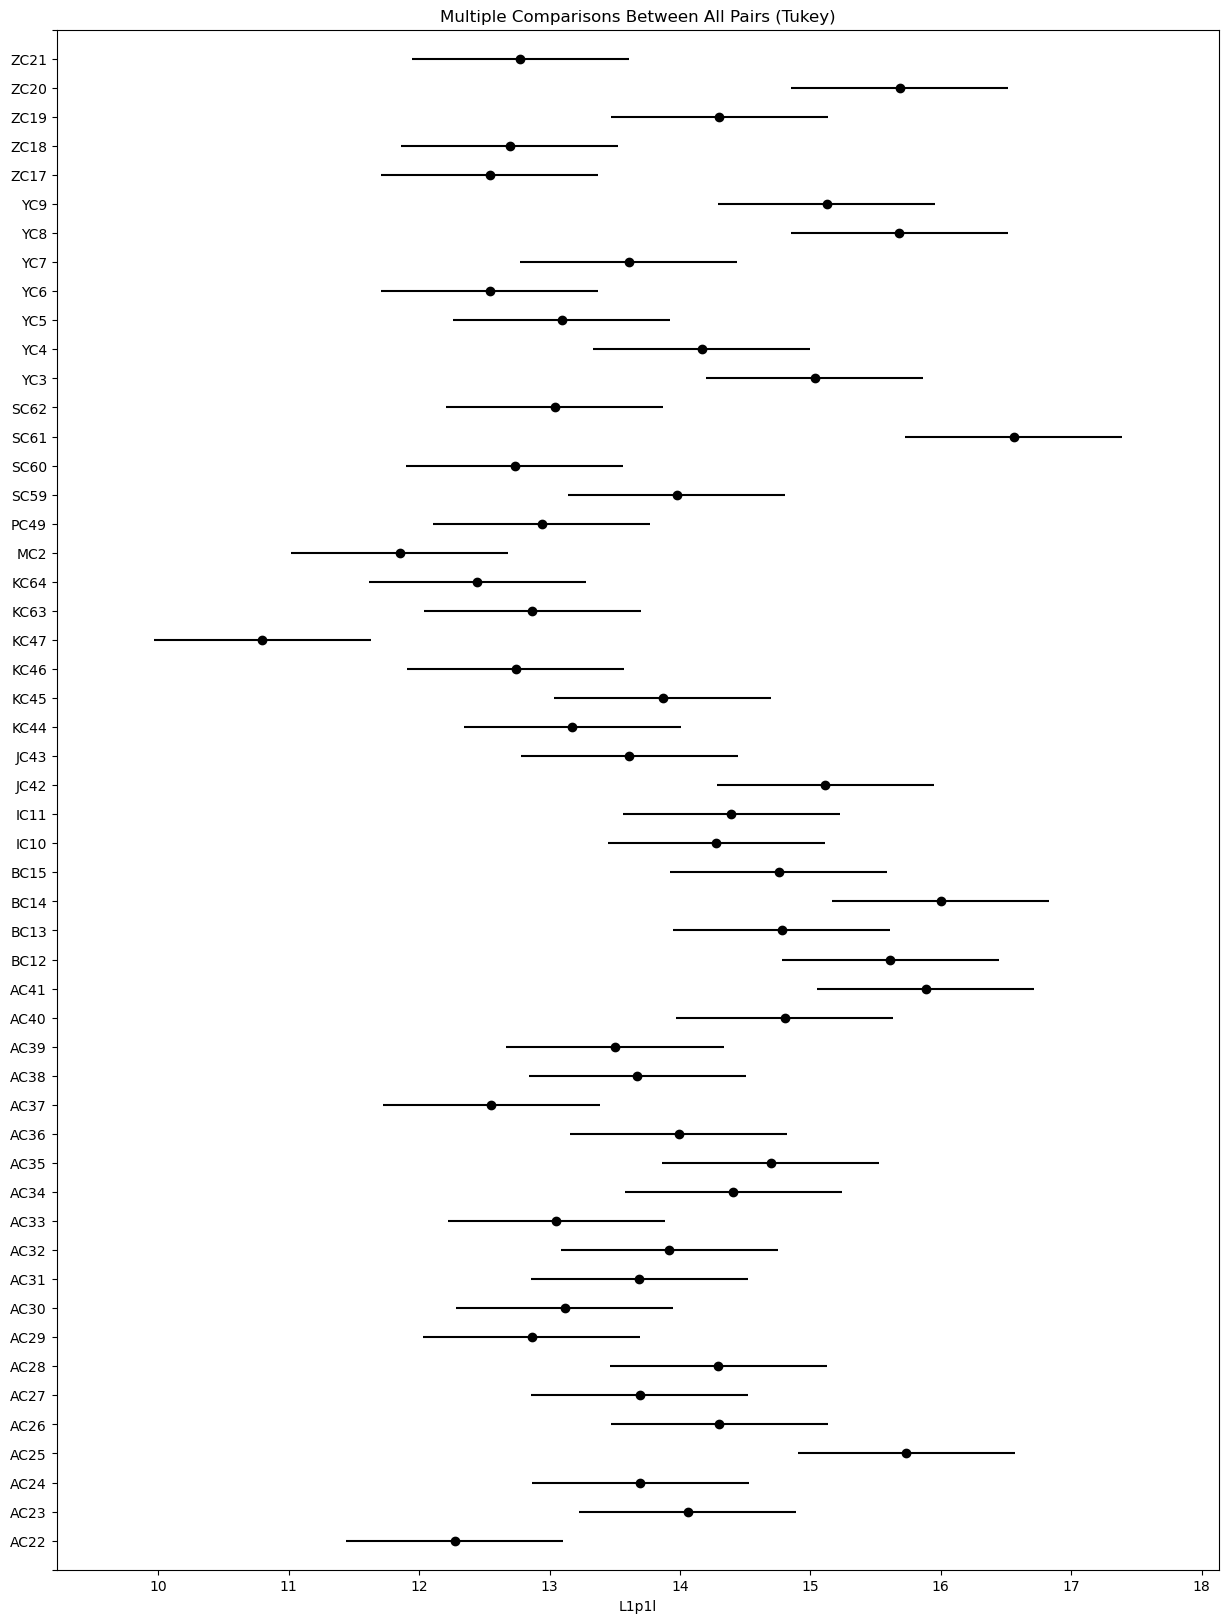

Performing Kruskall-Wallis test for: Dpl
KruskalResult(statistic=571.5096568403202, pvalue=4.1626300646780905e-89)


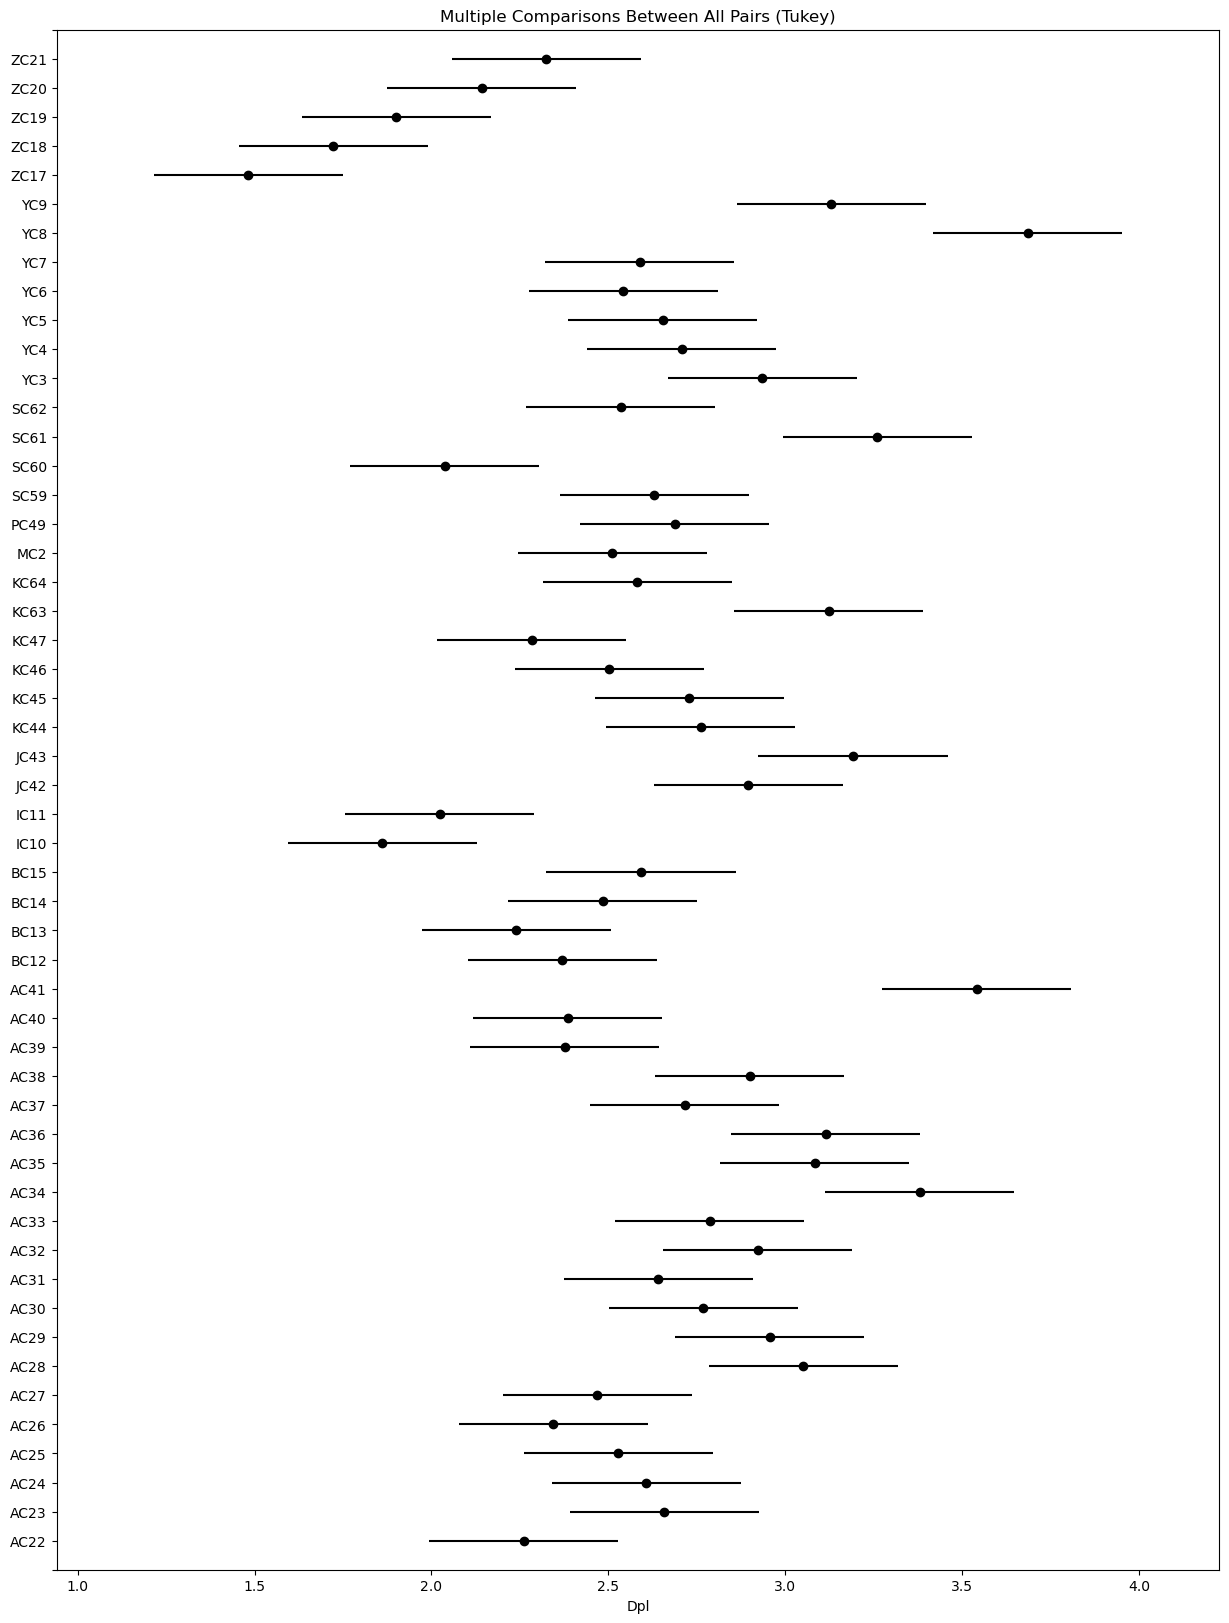

Performing Kruskall-Wallis test for: Lp
KruskalResult(statistic=610.1152328925157, pvalue=8.496454457635768e-97)


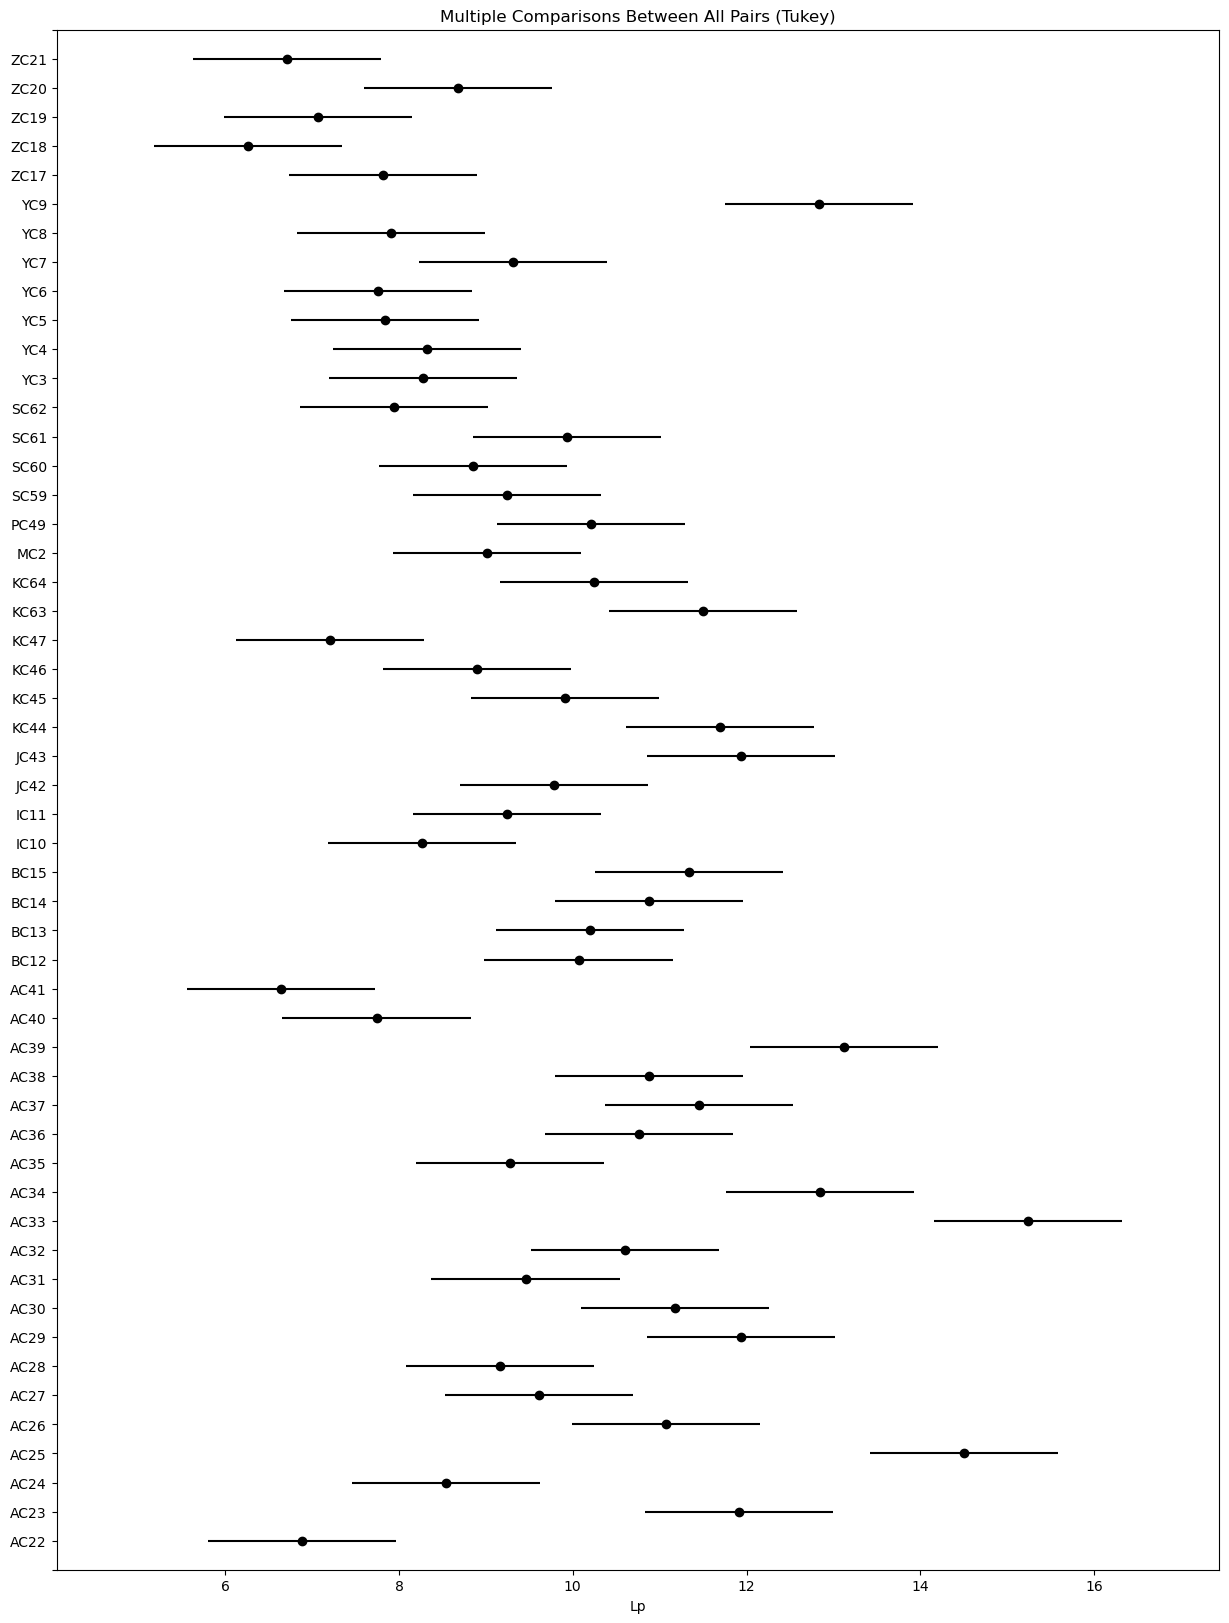

Performing Kruskall-Wallis test for: S2p3l
KruskalResult(statistic=281.35228331502657, pvalue=1.3469649891835418e-33)


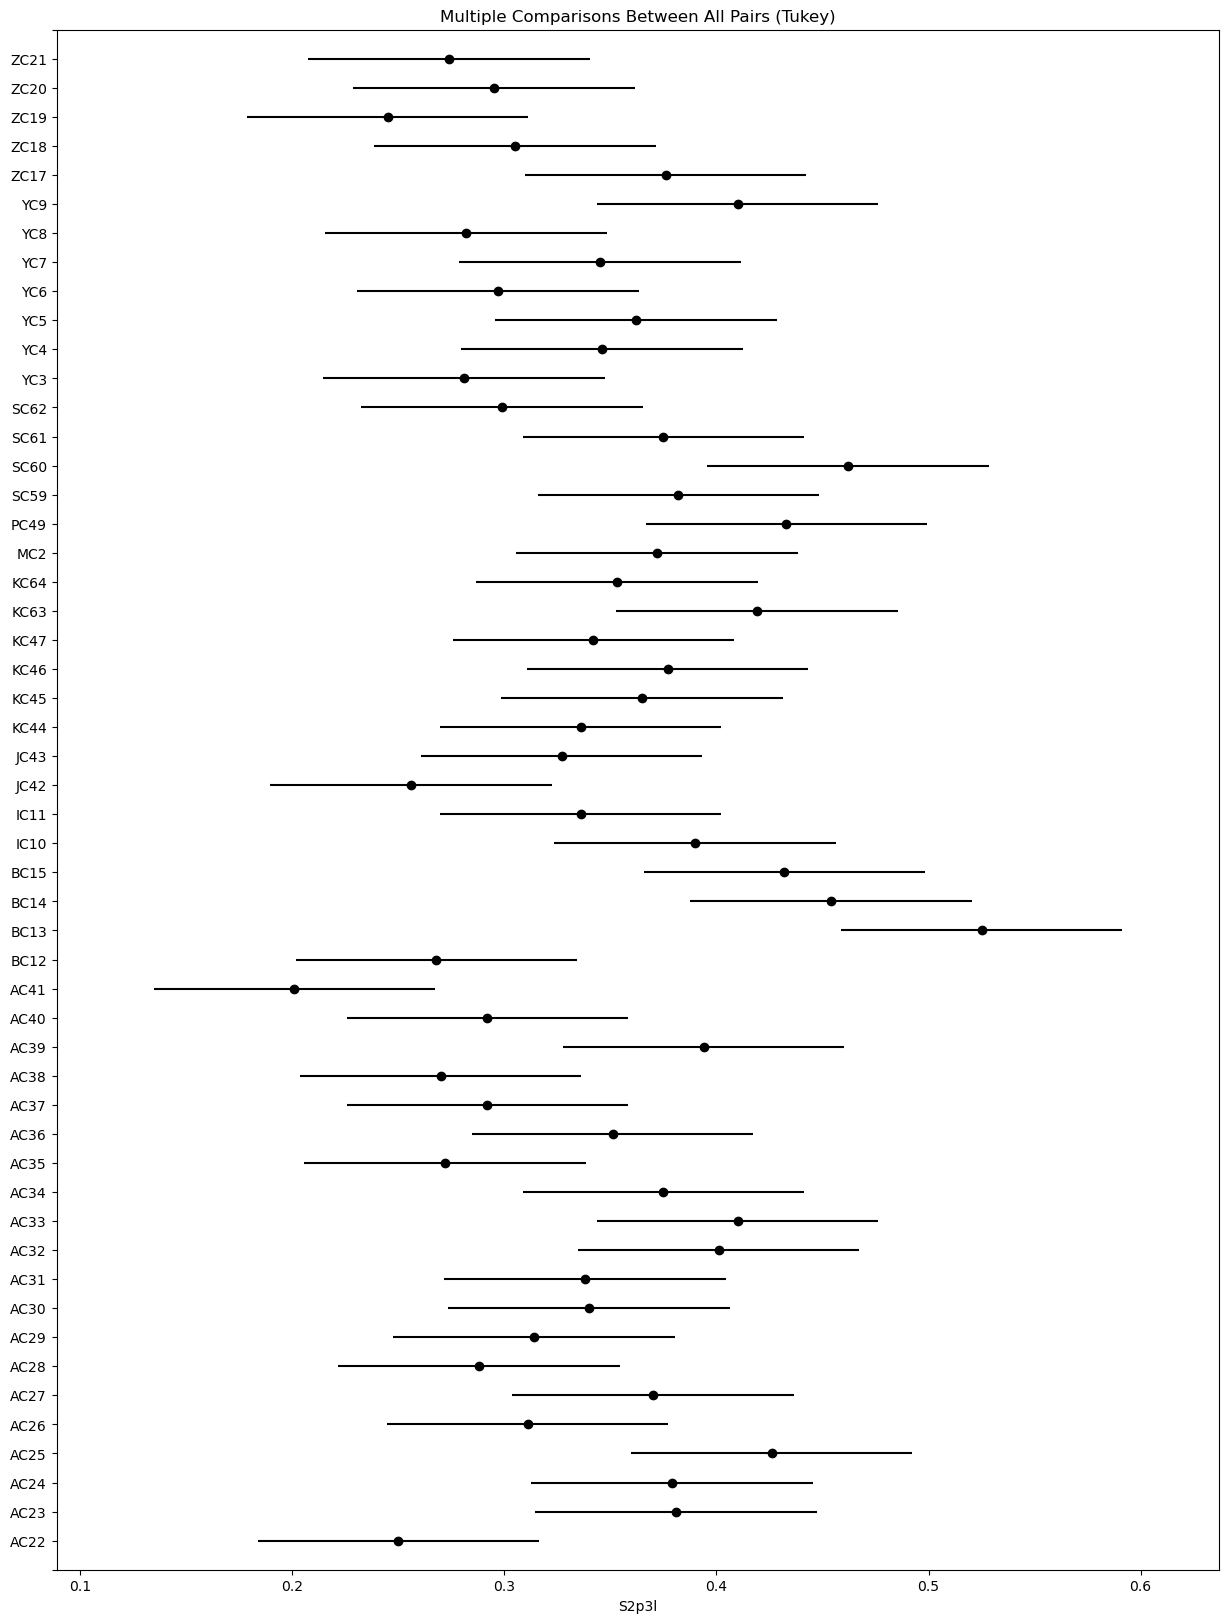

Performing Kruskall-Wallis test for: S2p4l
KruskalResult(statistic=311.174786786108, pvalue=5.211080316168314e-39)


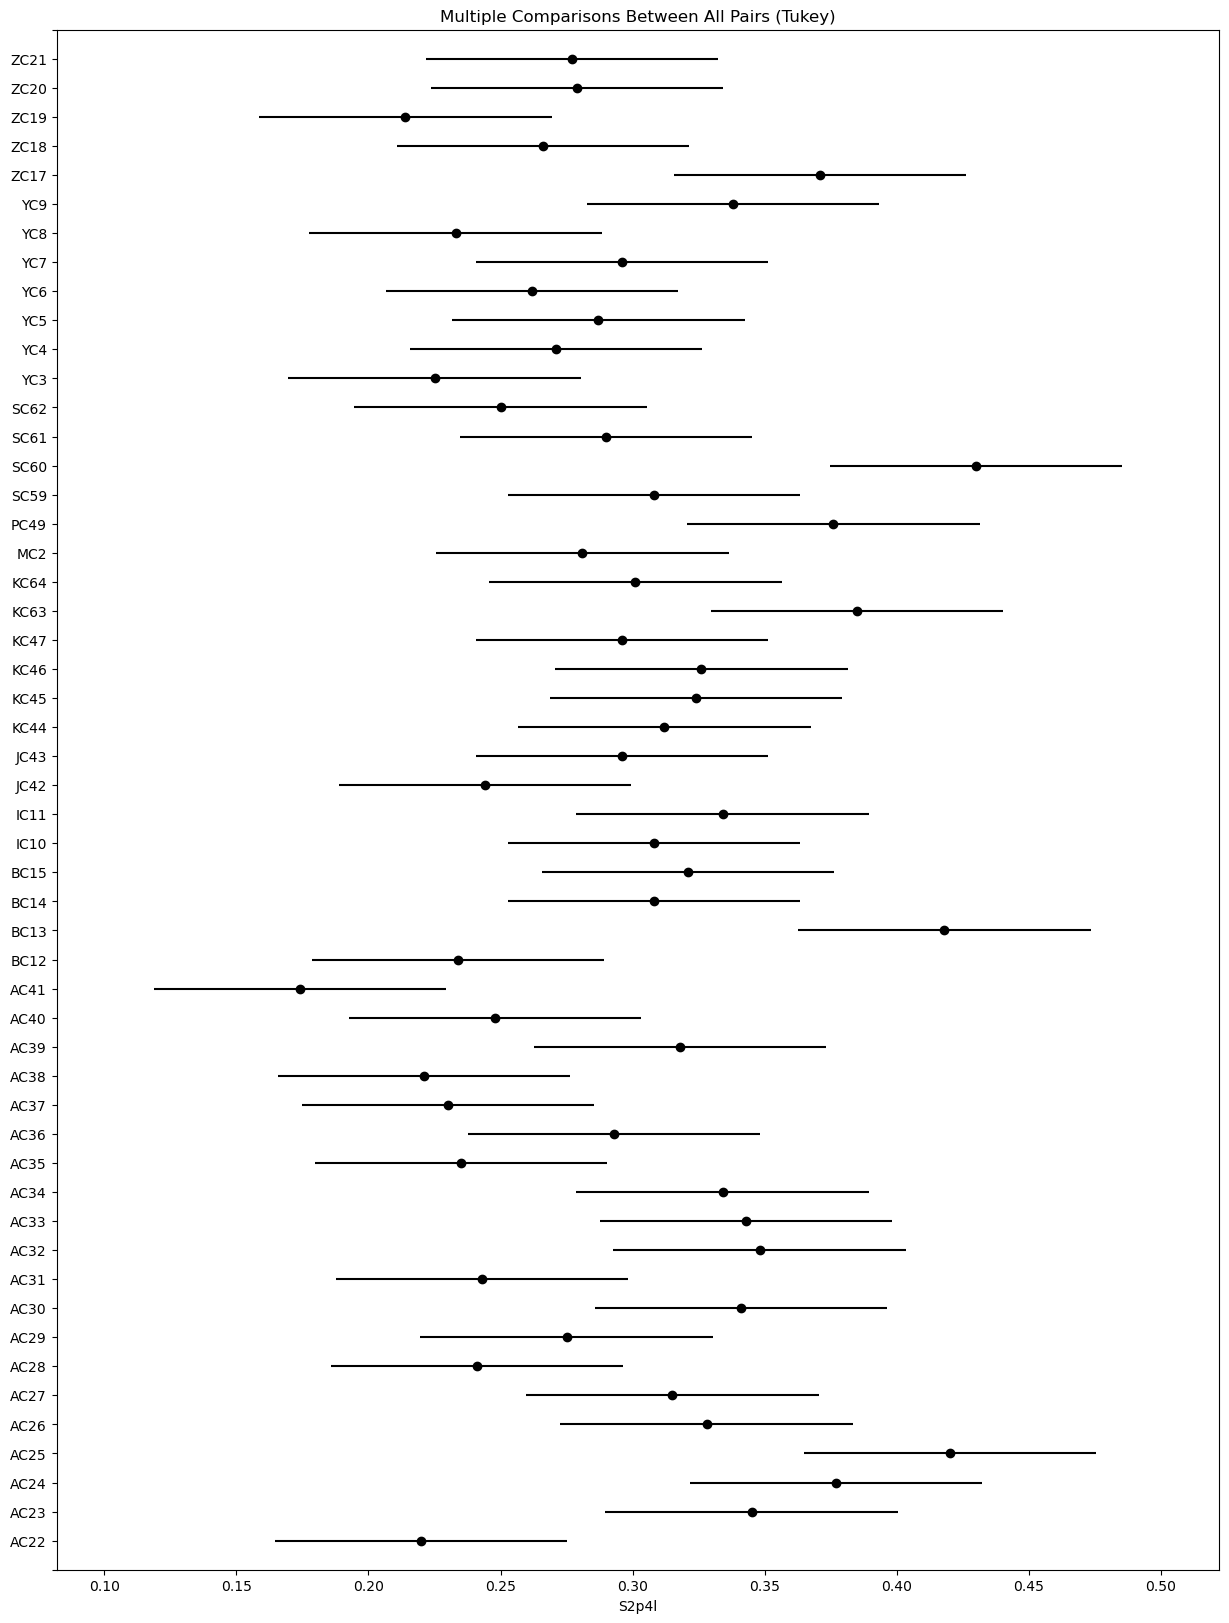

Performing Kruskall-Wallis test for: Wkd/Lkd
KruskalResult(statistic=501.19472693769495, pvalue=3.1393708632502974e-75)


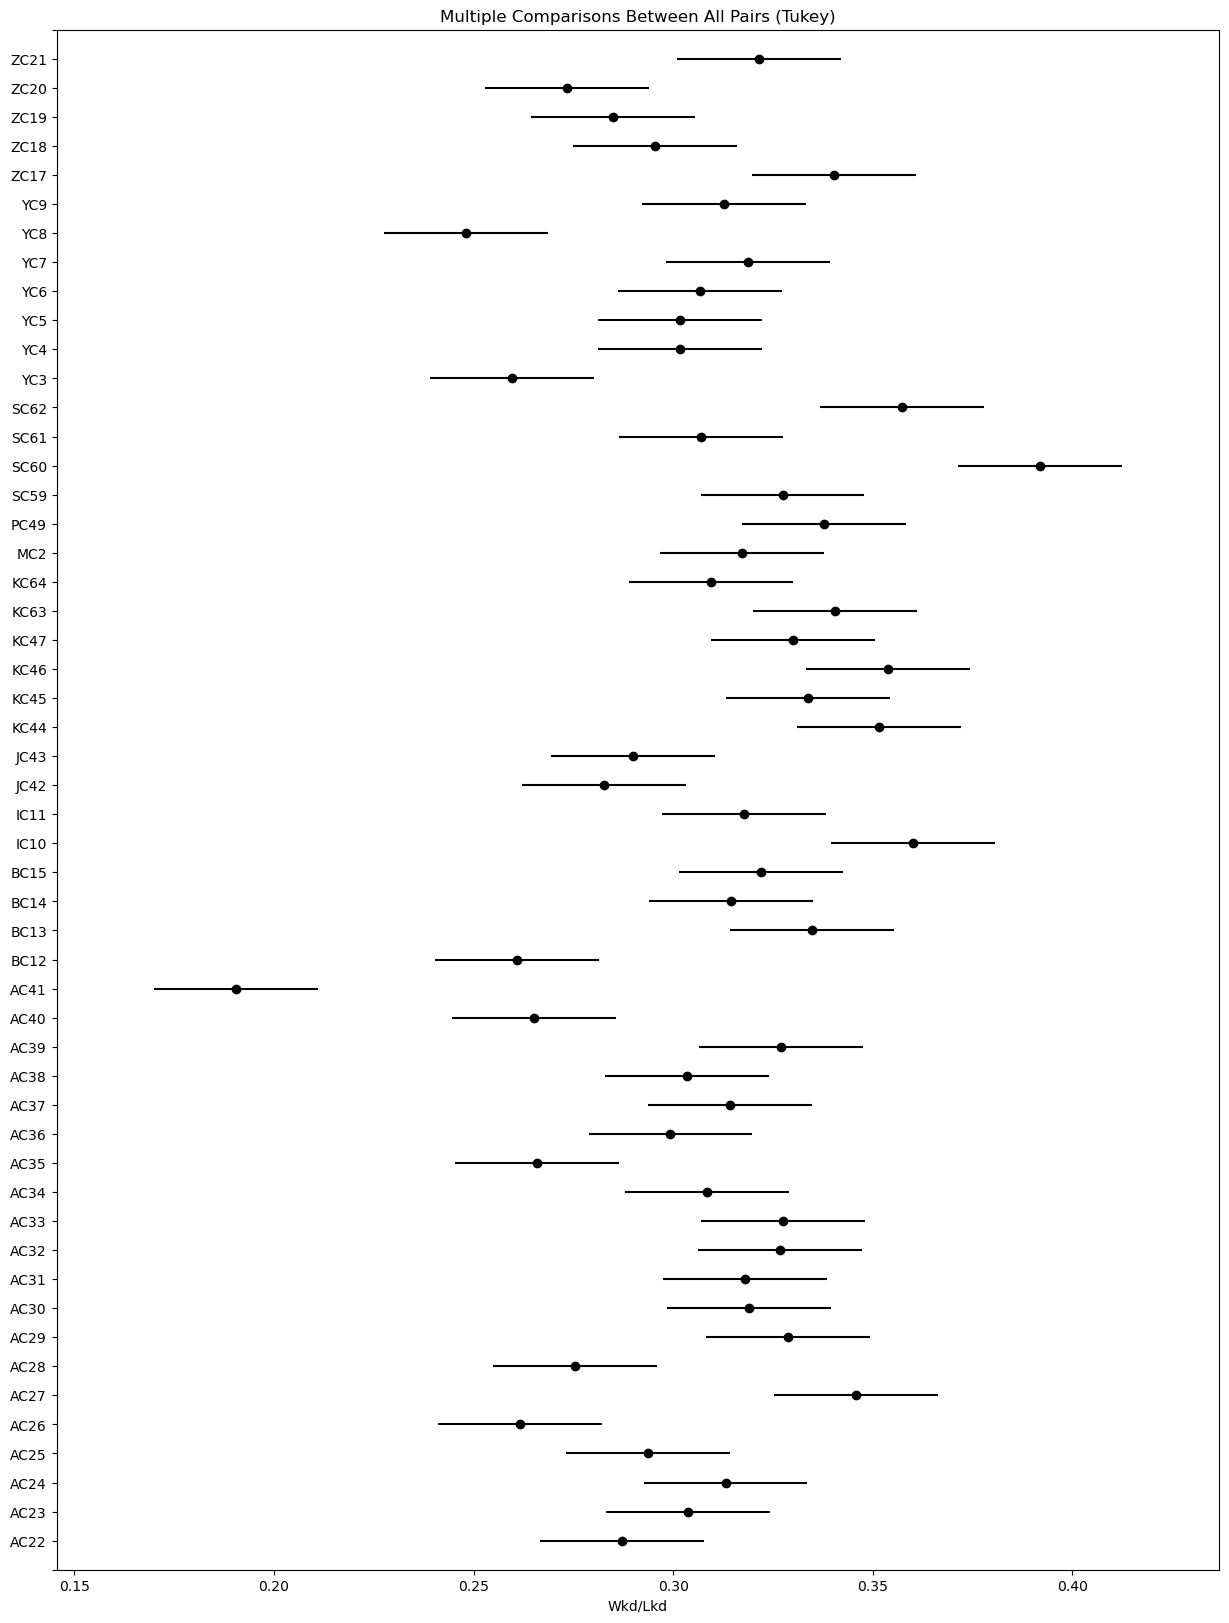

Performing Kruskall-Wallis test for: Dvsh/Dosh
KruskalResult(statistic=764.6634839428425, pvalue=5.812961724601365e-128)


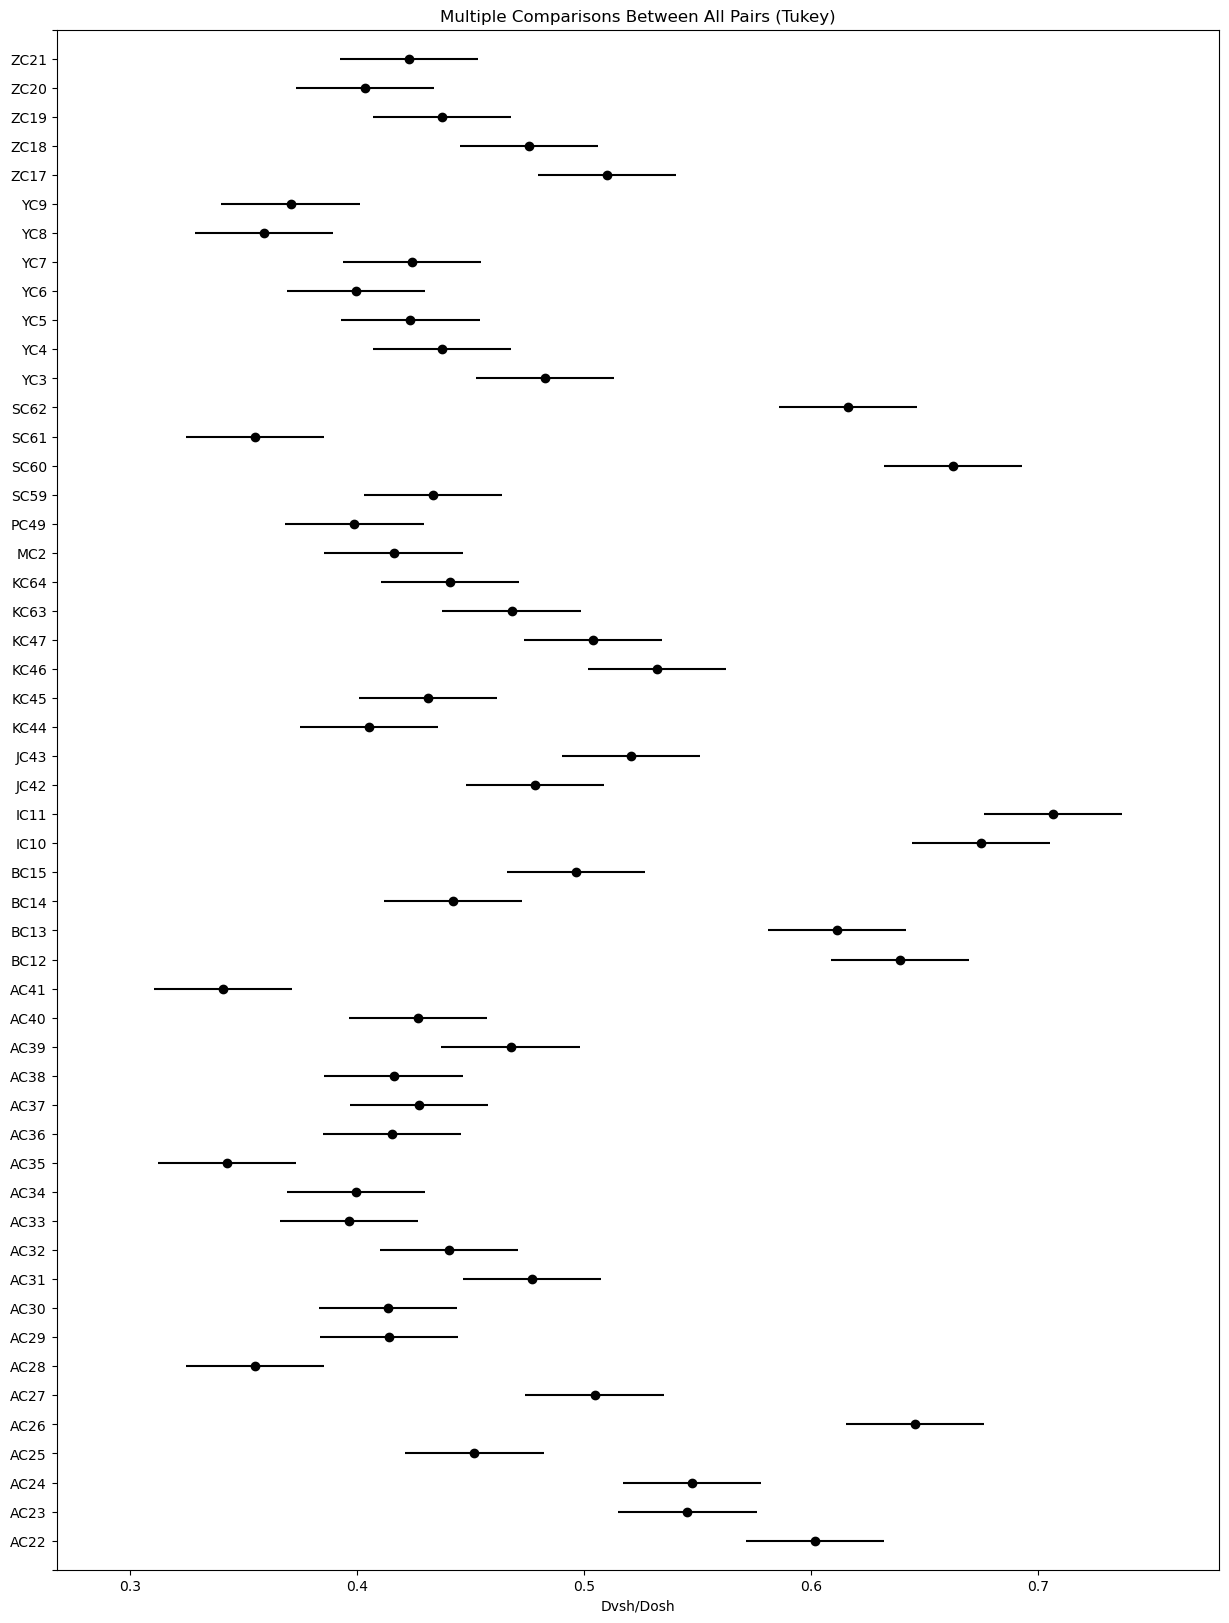

Performing Kruskall-Wallis test for: Lkd/L1p1l
KruskalResult(statistic=281.4948591162412, pvalue=1.2698180539546967e-33)


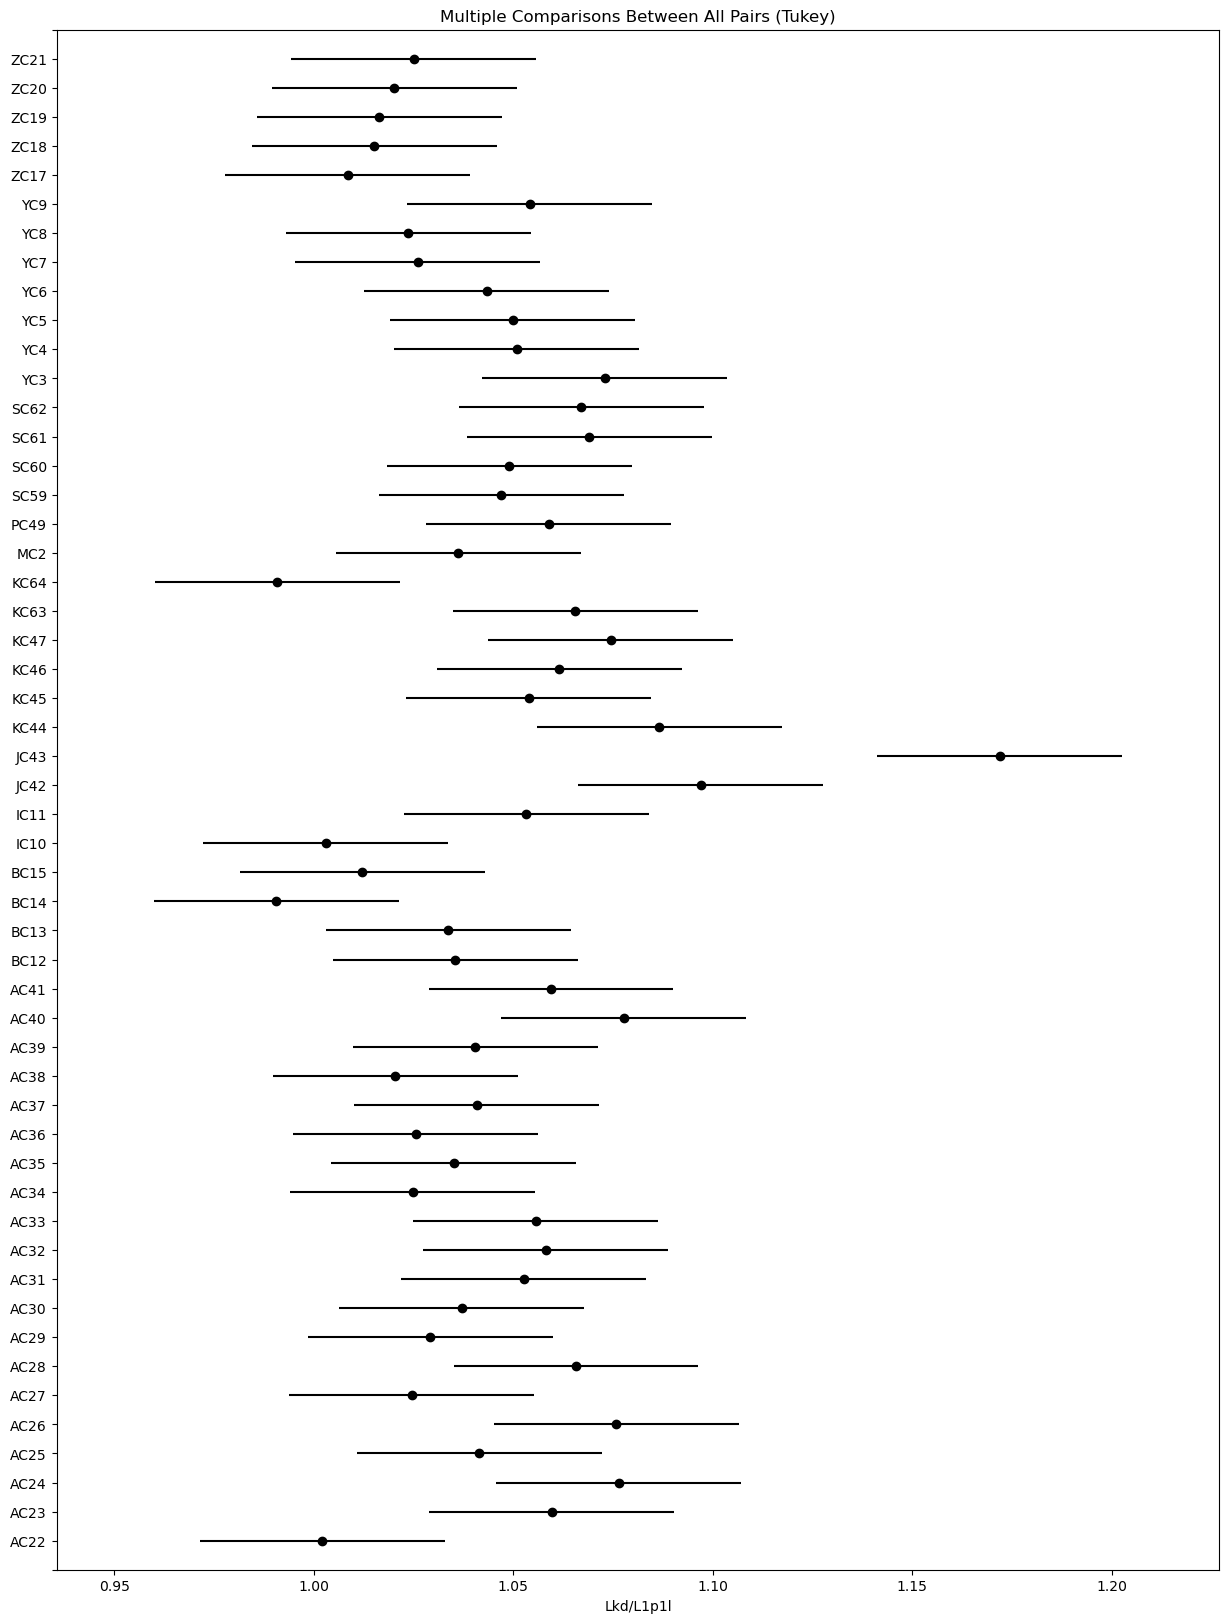

Performing Kruskall-Wallis test for: Dpl/Lp
KruskalResult(statistic=572.0799897322912, pvalue=3.206965946614039e-89)


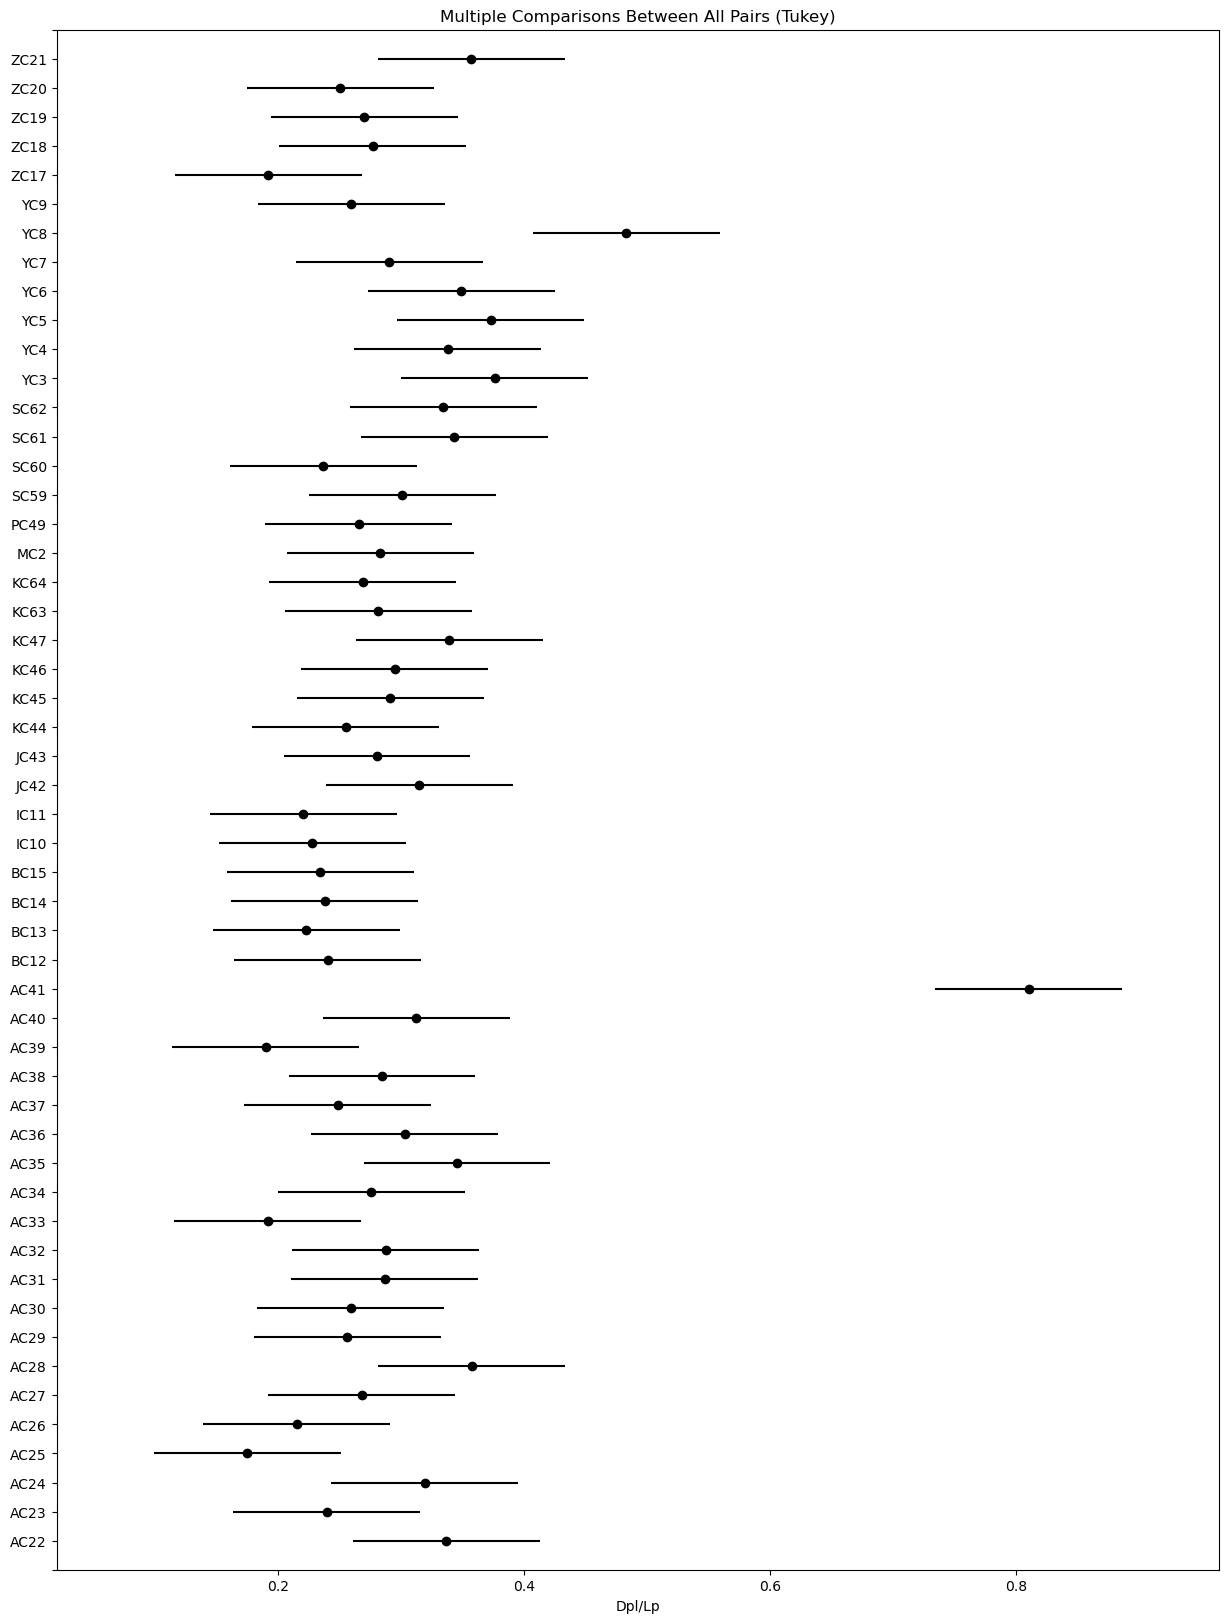

Performing Kruskall-Wallis test for: Ср.зн S2p3l-S2p4l
KruskalResult(statistic=349.14805836026153, pvalue=4.871561865576745e-46)


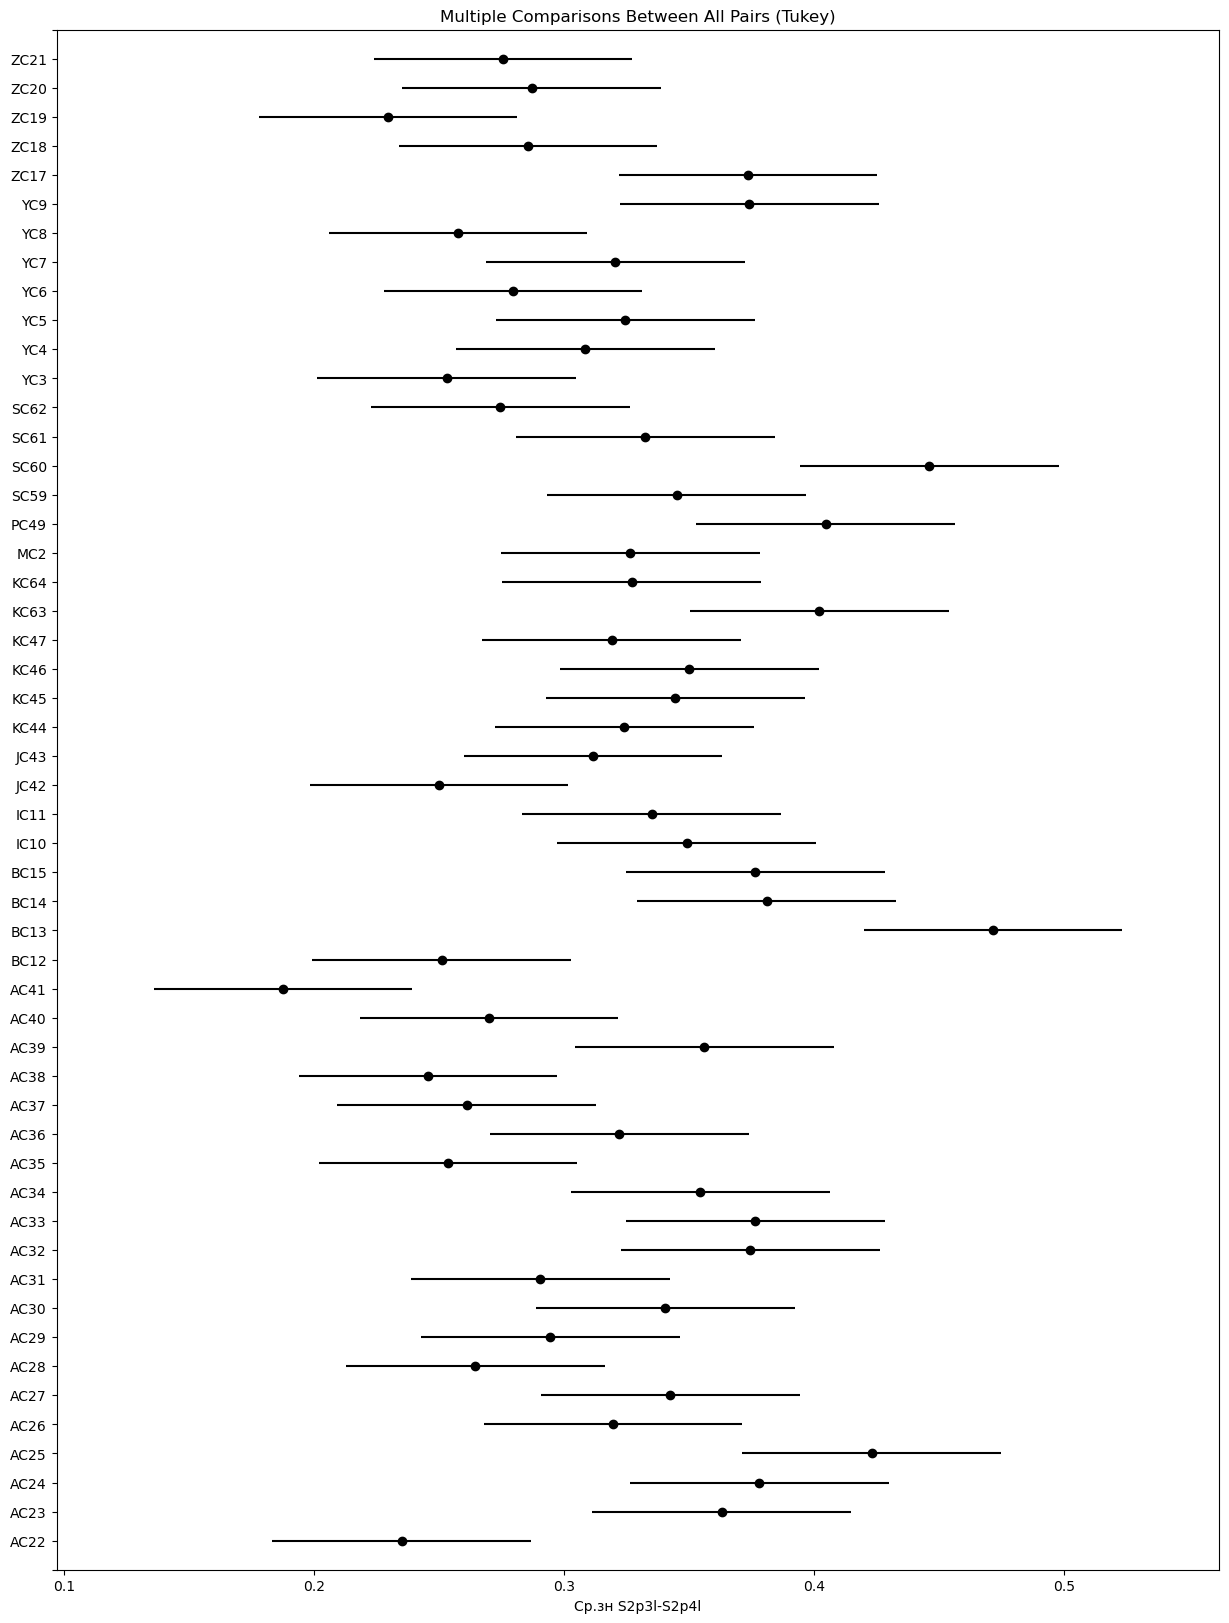

In [10]:
from statsmodels.stats.multicomp import MultiComparison
from scipy import stats as st
from matplotlib import pyplot as plt
mcomp = dict()
grp = data.groupby('POPUL_CODE').groups
for feature in morph_quant:
    mcomp[feature] = MultiComparison(data.loc[:,feature].values, data.POPUL_CODE.values)
    args = [data.loc[v, feature].values for k,v in grp.items()]
    print(f"Performing Kruskall-Wallis test for: {feature}")
    print(st.kruskal(*args))
    results = mcomp[feature].tukeyhsd()
    results.plot_simultaneous(xlabel=feature, figsize=(15, 20))
    #  print(results.summary())  # Uncomment this to show Tukeyhsd p-values
    plt.show()

#### Исследование различий популяций по качественным признакам по схеме one-vs-rest.

In [11]:
import rpy2.robjects.numpy2ri
from rpy2.robjects.packages import importr
rpy2.robjects.numpy2ri.activate()
rstats = importr('stats')

ModuleNotFoundError: No module named 'rpy2'

In [ ]:
results = []
for feature in morph_qual:
    for population in np.unique(data.POPUL_CODE):
        populations = np.where(data.POPUL_CODE == population, population, 'rest') 
        frame = data.groupby(populations)[feature].value_counts().unstack().fillna(0)
        try:
            pval = rstats.fisher_test(frame.values)[0][0]
        except Exception as exc:
            print(f"Exception {exc} raised on {population} and {feature}")
        else:
            print(f"Computed p-value for {feature} and {population}: {pval}")
            results.append((pval, feature, population))

In [ ]:
results = sorted(results, key=lambda x: x[0]) # sorting by p-value

In [ ]:
frame

In [ ]:
results[:10] # best cases

In [ ]:
results[-10:]  # worst cases

#### Можно ли определить код популяции исходя только из данных морфометрических измерений (используя количественные и качественные, конечно)?

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score

In [13]:
# Подготовка данных к классификации...
X = data.loc[:,morph_quant + morph_qual]
y = data.POPUL_CODE

In [14]:
std = StandardScaler()
X = std.fit_transform(X)

In [15]:
gbc = GradientBoostingClassifier()
res = cross_val_score(gbc, X, y, cv=5)

In [16]:
res

array([0.64903846, 0.72596154, 0.69711538, 0.74038462, 0.71153846])

In [17]:
print(f"Общее число классов:{len(np.unique(y))}")

Общее число классов:52


В общем, учитывая, что у нас все классы -- это коды популяций, представлены равным числом представителей, 
это достаточно неплохой результат. Если было бы какое-то случайное гадание, то точность должна была бы быть, около 1/52, что 0.02, а у нас здесь более 0.5. Это означает, что по количественным и качественным признакам, можно проследить к какой популяции принадлежит объект.

Поищем теперь, какие популяции хуже всего различаются по данным признакам (morph_quant + morph_qual).

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [19]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [20]:
np.unique(y)

array(['AC22', 'AC23', 'AC24', 'AC25', 'AC26', 'AC27', 'AC28', 'AC29',
       'AC30', 'AC31', 'AC32', 'AC33', 'AC34', 'AC35', 'AC36', 'AC37',
       'AC38', 'AC39', 'AC40', 'AC41', 'BC12', 'BC13', 'BC14', 'BC15',
       'IC10', 'IC11', 'JC42', 'JC43', 'KC44', 'KC45', 'KC46', 'KC47',
       'KC63', 'KC64', 'MC2', 'PC49', 'SC59', 'SC60', 'SC61', 'SC62',
       'YC3', 'YC4', 'YC5', 'YC6', 'YC7', 'YC8', 'YC9', 'ZC17', 'ZC18',
       'ZC19', 'ZC20', 'ZC21'], dtype=object)

In [21]:
y_pred = gbc.predict(X_test)

In [22]:
df = pd.DataFrame(confusion_matrix(y_test, y_pred, labels=np.unique(y)), columns=np.unique(y), index =np.unique(y))

In [23]:
y_pred = gbc.predict(X_test)
df = pd.DataFrame(confusion_matrix(y_test, y_pred, labels=np.unique(y)), columns=np.unique(y), index =np.unique(y))
rr=(df - np.diag(np.diag(df.values))).sum(axis=1) ==0
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df.shape)
    display(df)

(52, 52)


,AC22,AC23,AC24,AC25,AC26,AC27,AC28,AC29,AC30,AC31,AC32,AC33,AC34,AC35,AC36,AC37,AC38,AC39,AC40,AC41,BC12,BC13,BC14,BC15,IC10,IC11,JC42,JC43,KC44,KC45,KC46,KC47,KC63,KC64,MC2,PC49,SC59,SC60,SC61,SC62,YC3,YC4,YC5,YC6,YC7,YC8,YC9,ZC17,ZC18,ZC19,ZC20,ZC21
AC22,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0
AC23,0,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AC24,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AC25,0,0,2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AC26,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AC27,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AC28,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AC29,0,0,0,0,0,0,0,2,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AC30,0,0,0,0,0,0,0,2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AC31,0,1,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0


In [24]:
y_pred = gbc.predict(X)
df = pd.DataFrame(confusion_matrix(y, y_pred, labels=np.unique(y)), columns=np.unique(y), index =np.unique(y))
rr=(df - np.diag(np.diag(df.values))).sum(axis=1) == 0
print(rr.sum())
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df.shape)
    display(df)

19
(52, 52)


,AC22,AC23,AC24,AC25,AC26,AC27,AC28,AC29,AC30,AC31,AC32,AC33,AC34,AC35,AC36,AC37,AC38,AC39,AC40,AC41,BC12,BC13,BC14,BC15,IC10,IC11,JC42,JC43,KC44,KC45,KC46,KC47,KC63,KC64,MC2,PC49,SC59,SC60,SC61,SC62,YC3,YC4,YC5,YC6,YC7,YC8,YC9,ZC17,ZC18,ZC19,ZC20,ZC21
AC22,17,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0
AC23,0,19,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AC24,0,0,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AC25,0,0,2,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AC26,0,0,0,0,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AC27,0,0,0,0,0,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AC28,0,0,0,0,0,0,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AC29,0,0,0,0,0,0,0,16,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AC30,0,0,0,0,0,0,0,2,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AC31,0,1,0,0,0,0,0,0,0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0


In [25]:
print("Вклад признаков в разделение популяций:")
for item in sorted(list(zip(gbc.feature_importances_, morph_quant + morph_qual)), key=lambda x: x[0], reverse=True):
    if item[1] in morph_qual:
        print(f"Качественный:   {item}")
    else:
        print(f"Количественный: {item}")

Вклад признаков в разделение популяций:
Количественный: (0.09953967510390964, 'Dvsh/Dosh')
Качественный:   (0.08619960770638928, 'Dnvs')
Качественный:   (0.08140665622762583, 'Dnl')
Количественный: (0.07538451837235101, 'Dpl/Lp')
Количественный: (0.061401076431514316, 'Dvsh')
Количественный: (0.057328240442657594, 'Wkd/Lkd')
Качественный:   (0.056531574708313125, 'Dc')
Количественный: (0.05139659681265173, 'Lp')
Качественный:   (0.050735648060675445, 'Dnns')
Количественный: (0.05004441175197827, 'Dpl')
Количественный: (0.04650133483498544, 'Lkd/L1p1l')
Количественный: (0.040425235068920234, 'Wkd')
Качественный:   (0.03467762331974923, 'Dvns')
Качественный:   (0.03422644275374439, 'Dp')
Качественный:   (0.028163764734009795, 'Dvl')
Количественный: (0.028055322974146084, 'Lkd')
Количественный: (0.026414118747679353, 'S2p3l')
Количественный: (0.02629252142906168, 'L1p1l')
Количественный: (0.022343076212524595, 'Dosh')
Качественный:   (0.0166645518662526, 'Dvvs')
Количественный: (0.0131624

#### Исследование связи признаков с климатическими показателями: 1) можно ли по климатическим показателям сказать какая популяция тут растет?

In [26]:
X = data.loc[:,climate].astype(int)
X.head()

,IC,PN,WK,CK,IOE,Ann_PREC,T,U,R,S
0,39,157,11,-198,1,425,1024,75,478,1862
1,39,157,11,-198,1,425,1024,75,478,1862
2,39,157,11,-198,1,425,1024,75,478,1862
3,39,157,11,-198,1,425,1024,75,478,1862
4,39,157,11,-198,1,425,1024,75,478,1862


In [27]:
y = data.POPUL_CODE
std = StandardScaler()
X = std.fit_transform(X)
res = cross_val_score(gbc, X, y, cv=5)
print(f"Общая оценка точности определения популяции по климату: accuracy = {res}")

Общая оценка точности определения популяции по климату: accuracy = [1. 1. 1. 1. 1.]


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [29]:
y_pred = gbc.predict(X_test)
df = pd.DataFrame(confusion_matrix(y_test, y_pred, labels=np.unique(y)), columns=np.unique(y), index=np.unique(y))
y_pred = gbc.predict(X_test)
df = pd.DataFrame(confusion_matrix(y_test, y_pred, labels=np.unique(y)), columns=np.unique(y), index=np.unique(y))
rr=(df - np.diag(np.diag(df.values))).sum(axis=1) ==0
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df.shape)
    display(df)

(52, 52)


,AC22,AC23,AC24,AC25,AC26,AC27,AC28,AC29,AC30,AC31,AC32,AC33,AC34,AC35,AC36,AC37,AC38,AC39,AC40,AC41,BC12,BC13,BC14,BC15,IC10,IC11,JC42,JC43,KC44,KC45,KC46,KC47,KC63,KC64,MC2,PC49,SC59,SC60,SC61,SC62,YC3,YC4,YC5,YC6,YC7,YC8,YC9,ZC17,ZC18,ZC19,ZC20,ZC21
AC22,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AC23,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AC24,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AC25,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AC26,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AC27,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AC28,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AC29,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AC30,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AC31,0,0,0,0,0,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [30]:
print("Вклад признаков в разделение популяций:")
for item in sorted(list(zip(gbc.feature_importances_, climate)), key=lambda x: x[0], reverse=True):
    print(item)

Вклад признаков в разделение популяций:
(0.29496787463402047, 'Ann_PREC')
(0.149466167125111, 'PN')
(0.10080341794731822, 'R')
(0.09642074010666384, 'T')
(0.08375056405210132, 'WK')
(0.08016423483246674, 'IC')
(0.07563624326205043, 'CK')
(0.06913633618352874, 'U')
(0.04918502108443264, 'S')
(0.00046940077230674267, 'IOE')


Да, похоже по климату мы предсказываем однозначно к какой популяции принадлежит набор... Даже после округления климатических данных до целых, видно ,что каждому климатическому набору соответствует в точности одна популяция... Хотя это и хорошо, дело тут в другом, слишком точных и уникальных измерениях климата, они просто отражают принадлежность популяции и все. Здесь нельзя делать никаких выводов. 

#### Попытка прогнозировать количественные и качественные морфометрические признаки по климату

In [31]:
X = data.loc[:,climate]
X.head()
std = StandardScaler()
X = std.fit_transform(X)
lab_enc = LabelEncoder()
from collections import Counter

In [32]:
for feature in morph_qual + morph_quant:
    if feature in morph_qual:
        print(f"Попытка для качественного признака {feature}:")
        y = lab_enc.fit_transform(data.loc[:, feature])
        clf = GradientBoostingClassifier()
        res = cross_val_score(clf, X, y, cv=5, scoring='balanced_accuracy')
        cnt = Counter(y)
        for key in cnt:
            print(f"{lab_enc.inverse_transform([key])}: #{cnt[key]}")
        print(f"Средняя точность {feature}: accuracy = {abs(res).mean()}")
    
    print(f"Общая оценка точности определения {feature}: accuracy = {abs(res)}")
    
    print(f"Попытка для количественного признака {feature}:")
    clf = GradientBoostingRegressor()
    res = cross_val_score(clf, X, y, cv=5, scoring='neg_mean_squared_error')
    print(f"Средняя точность {feature}: mse = {abs(res).mean()/y.mean()}")
    
    
    print("=" * 50)
    

Попытка для качественного признака Dp:


C:\Users\ASUS\anaconda3\envs\sci\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\ASUS\anaconda3\envs\sci\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


[0.3]: #779
[0.1]: #225
[0.7]: #30
[0.86]: #1
[0.22]: #2
[0.54]: #2
[0.38]: #1
Средняя точность Dp: accuracy = 0.4377671629445824
Общая оценка точности определения Dp: accuracy = [0.45352564 0.60683761 0.51068376 0.43162393 0.18616487]
Попытка для количественного признака Dp:
Средняя точность Dp: mse = 0.8642156006574152
Попытка для качественного признака Dvl:


C:\Users\ASUS\anaconda3\envs\sci\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\ASUS\anaconda3\envs\sci\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


[0.3]: #768
[0.7]: #40
[0.1]: #227
[0.54]: #4
[0.76]: #1
Средняя точность Dvl: accuracy = 0.31401427039854146
Общая оценка точности определения Dvl: accuracy = [0.37025613 0.29310967 0.40584416 0.3036374  0.197224  ]
Попытка для количественного признака Dvl:
Средняя точность Dvl: mse = 0.5531473814969196
Попытка для качественного признака Dnl:


C:\Users\ASUS\anaconda3\envs\sci\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\ASUS\anaconda3\envs\sci\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
C:\Users\ASUS\anaconda3\envs\sci\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


[0.3]: #363
[0.1]: #563
[0.7]: #55
[0.]: #40
[0.14]: #2
[0.18]: #1
[0.22]: #1
[0.46]: #3
[0.88]: #1
[0.26]: #1
[0.54]: #4
[0.42]: #3
[1.]: #2
[0.76]: #1
Средняя точность Dnl: accuracy = 0.40969056390717346
Общая оценка точности определения Dnl: accuracy = [0.47240358 0.47393285 0.44685665 0.36561969 0.28964004]
Попытка для количественного признака Dnl:
Средняя точность Dnl: mse = 3.004258387770263
Попытка для качественного признака Dc:
[0.3]: #155
[0.7]: #812
[1.]: #73
Средняя точность Dc: accuracy = 0.6390924280230963
Общая оценка точности определения Dc: accuracy = [0.82822086 0.71351767 0.95884774 0.54301075 0.15186513]
Попытка для количественного признака Dc:
Средняя точность Dc: mse = 0.3099595965512687
Попытка для качественного признака Dvns:


C:\Users\ASUS\anaconda3\envs\sci\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\ASUS\anaconda3\envs\sci\lib\site-packages\sklearn\metrics\_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


[0.3]: #816
[0.1]: #190
[0.7]: #33
[0.]: #1
Средняя точность Dvns: accuracy = 0.6243930659358256
Общая оценка точности определения Dvns: accuracy = [0.67886179 0.78070175 0.6650522  0.66182327 0.33552632]
Попытка для количественного признака Dvns:
Средняя точность Dvns: mse = 0.16754560113498587
Попытка для качественного признака Dnns:
[0.3]: #654
[0.1]: #320
[0.7]: #41
[0.]: #25
Средняя точность Dnns: accuracy = 0.7089830344327005
Общая оценка точности определения Dnns: accuracy = [0.49507395 0.69990458 0.64623092 0.88761331 0.81609241]
Попытка для количественного признака Dnns:
Средняя точность Dnns: mse = 0.34555274617299275
Попытка для качественного признака Dvvs:
[0.1]: #997
[0.3]: #22
[0.]: #21
Средняя точность Dvvs: accuracy = 0.8775058626465662
Общая оценка точности определения Dvvs: accuracy = [1.         0.865      1.         0.93467337 0.58785595]
Попытка для количественного признака Dvvs:
Средняя точность Dvvs: mse = 0.05988991066940973
Попытка для качественного признака Dn

### Анализ вариабильности признаков

Какой признак в какой популяции наиболее вариабельный

In [33]:
for feature in morph_quant:
    print(f"Количественный признак: {feature}")
    print("Наименьшая вариабельность внутри группы (коэф. вариации):")
    cvars = data.groupby('POPUL_CODE')[feature].apply(lambda x: 100 * x.std()/x.mean()).sort_values(ascending=True)
    display(cvars.iloc[:5])
    print("Наибольшая вариабельность внутри группы (коэф. вариации):")
    cvars = data.groupby('POPUL_CODE')[feature].apply(lambda x: 100 * x.std()/x.mean()).sort_values(ascending=True)
    display(cvars.iloc[-5:])

Количественный признак: Lkd
Наименьшая вариабельность внутри группы (коэф. вариации):


POPUL_CODE
SC60    4.522988
SC62    4.976591
IC10    5.255777
KC44    5.592241
AC33    5.641040
Name: Lkd, dtype: float64

Наибольшая вариабельность внутри группы (коэф. вариации):


POPUL_CODE
ZC17    13.851177
JC42    13.921560
KC64    14.076781
MC2     15.021460
AC41    18.034920
Name: Lkd, dtype: float64

Количественный признак: Wkd
Наименьшая вариабельность внутри группы (коэф. вариации):


POPUL_CODE
AC32    5.663850
AC39    5.947973
SC60    5.987986
AC30    6.733495
JC43    7.020193
Name: Wkd, dtype: float64

Наибольшая вариабельность внутри группы (коэф. вариации):


POPUL_CODE
ZC21    13.757102
SC59    14.179955
ZC18    15.061834
AC22    17.339695
AC41    22.722800
Name: Wkd, dtype: float64

Количественный признак: Dvsh
Наименьшая вариабельность внутри группы (коэф. вариации):


POPUL_CODE
AC32    5.944424
AC39    6.258288
AC34    6.390564
AC33    6.568219
IC10    6.578046
Name: Dvsh, dtype: float64

Наибольшая вариабельность внутри группы (коэф. вариации):


POPUL_CODE
KC64    13.604556
JC42    13.896072
MC2     13.990897
ZC17    14.104094
AC41    22.427536
Name: Dvsh, dtype: float64

Количественный признак: Dosh
Наименьшая вариабельность внутри группы (коэф. вариации):


POPUL_CODE
SC60    5.245942
AC36    5.760926
SC62    6.038854
YC9     6.231996
AC33    6.587065
Name: Dosh, dtype: float64

Наибольшая вариабельность внутри группы (коэф. вариации):


POPUL_CODE
ZC17    14.767742
KC64    15.395313
JC42    15.593311
MC2     16.185892
AC41    17.830615
Name: Dosh, dtype: float64

Количественный признак: L1p1l
Наименьшая вариабельность внутри группы (коэф. вариации):


POPUL_CODE
AC29    4.915403
SC60    5.399254
AC37    5.570303
AC34    5.609587
AC33    5.738313
Name: L1p1l, dtype: float64

Наибольшая вариабельность внутри группы (коэф. вариации):


POPUL_CODE
AC22    13.613249
JC42    14.007406
SC61    14.436974
MC2     15.272605
AC41    21.197818
Name: L1p1l, dtype: float64

Количественный признак: Dpl
Наименьшая вариабельность внутри группы (коэф. вариации):


POPUL_CODE
BC14    7.156833
JC42    9.057245
MC2     9.112552
KC44    9.257083
SC60    9.793913
Name: Dpl, dtype: float64

Наибольшая вариабельность внутри группы (коэф. вариации):


POPUL_CODE
AC38    17.627978
YC9     17.725455
SC61    21.113754
AC40    21.939792
AC41    39.432385
Name: Dpl, dtype: float64

Количественный признак: Lp
Наименьшая вариабельность внутри группы (коэф. вариации):


POPUL_CODE
JC42     8.740766
SC60    10.635266
ZC19    12.591872
IC10    12.736726
ZC18    13.382770
Name: Lp, dtype: float64

Наибольшая вариабельность внутри группы (коэф. вариации):


POPUL_CODE
AC40    22.542910
BC14    23.000418
AC28    23.112644
YC3     23.723670
SC61    24.118507
Name: Lp, dtype: float64

Количественный признак: S2p3l
Наименьшая вариабельность внутри группы (коэф. вариации):


POPUL_CODE
JC42    15.334470
ZC21    18.359247
AC39    20.109941
KC44    20.309839
AC24    21.890448
Name: S2p3l, dtype: float64

Наибольшая вариабельность внутри группы (коэф. вариации):


POPUL_CODE
YC6     40.714444
ZC19    41.190551
YC8     43.894501
AC40    53.166143
AC22    56.180161
Name: S2p3l, dtype: float64

Количественный признак: S2p4l
Наименьшая вариабельность внутри группы (коэф. вариации):


POPUL_CODE
JC42    14.710894
ZC17    17.618698
AC31    18.553381
AC37    20.827570
PC49    21.596145
Name: S2p4l, dtype: float64

Наибольшая вариабельность внутри группы (коэф. вариации):


POPUL_CODE
YC8     38.009273
AC28    38.406672
AC41    40.526947
AC35    40.757171
AC22    43.747864
Name: S2p4l, dtype: float64

Количественный признак: Wkd/Lkd
Наименьшая вариабельность внутри группы (коэф. вариации):


POPUL_CODE
SC61    4.372793
AC27    5.149427
SC60    5.239815
AC25    6.158517
AC36    6.484410
Name: Wkd/Lkd, dtype: float64

Наибольшая вариабельность внутри группы (коэф. вариации):


POPUL_CODE
BC14    14.214612
KC46    14.790493
AC41    14.998738
AC22    15.118622
JC42    17.759525
Name: Wkd/Lkd, dtype: float64

Количественный признак: Dvsh/Dosh
Наименьшая вариабельность внутри группы (коэф. вариации):


POPUL_CODE
BC13    5.406709
BC12    5.463391
AC39    5.773702
YC8     6.292429
AC31    6.979584
Name: Dvsh/Dosh, dtype: float64

Наибольшая вариабельность внутри группы (коэф. вариации):


POPUL_CODE
BC14    13.163395
AC24    13.563516
AC41    13.608105
AC26    15.810815
BC15    16.193063
Name: Dvsh/Dosh, dtype: float64

Количественный признак: Lkd/L1p1l
Наименьшая вариабельность внутри группы (коэф. вариации):


POPUL_CODE
JC42    2.167967
AC35    2.639835
SC60    2.929892
AC29    3.108893
ZC20    3.154021
Name: Lkd/L1p1l, dtype: float64

Наибольшая вариабельность внутри группы (коэф. вариации):


POPUL_CODE
BC14    6.085439
SC62    6.172070
PC49    6.210573
AC41    6.795740
AC31    8.090652
Name: Lkd/L1p1l, dtype: float64

Количественный признак: Dpl/Lp
Наименьшая вариабельность внутри группы (коэф. вариации):


POPUL_CODE
JC42    10.493604
AC35    10.715225
AC25    10.892054
SC60    11.428963
KC46    11.623220
Name: Dpl/Lp, dtype: float64

Наибольшая вариабельность внутри группы (коэф. вариации):


POPUL_CODE
YC5     26.758681
AC37    27.137794
AC28    27.199966
AC38    28.804613
AC41    94.957599
Name: Dpl/Lp, dtype: float64

Количественный признак: Ср.зн S2p3l-S2p4l
Наименьшая вариабельность внутри группы (коэф. вариации):


POPUL_CODE
JC42    11.387898
AC36    14.622159
ZC17    16.579151
KC44    17.181540
AC24    17.371062
Name: Ср.зн S2p3l-S2p4l, dtype: float64

Наибольшая вариабельность внутри группы (коэф. вариации):


POPUL_CODE
ZC19    35.355785
AC41    35.414339
YC8     36.817824
AC40    42.297051
AC22    49.615519
Name: Ср.зн S2p3l-S2p4l, dtype: float64

In [34]:
varX = pd.DataFrame()
for feature in morph_quant:
    cvars = data.groupby('POPUL_CODE')[feature].apply(lambda x: 100 * x.std()/x.mean())
    varX[feature] = cvars

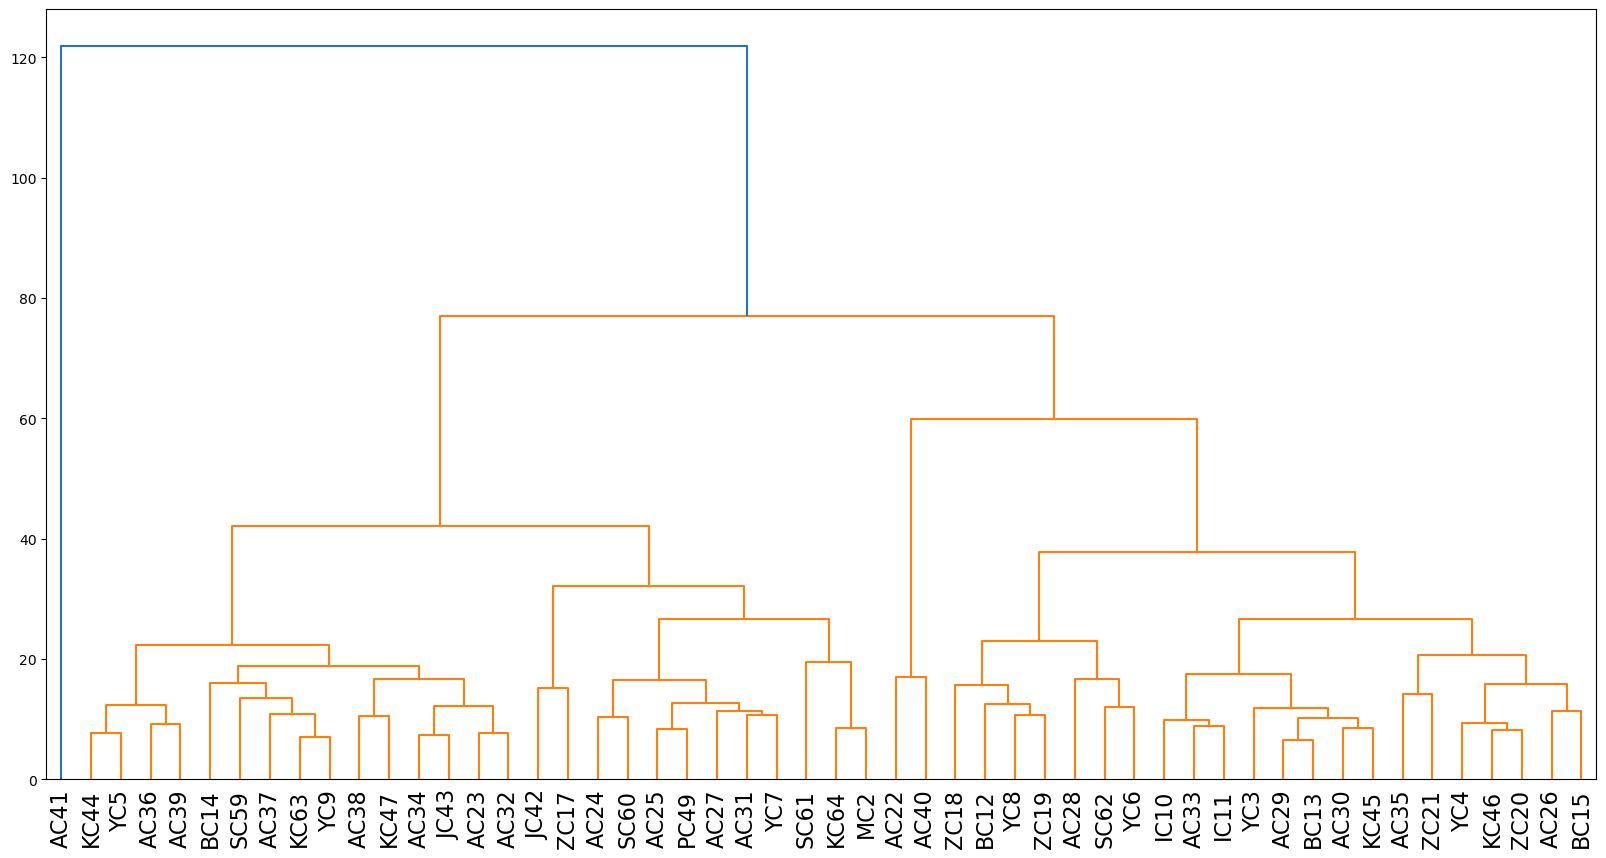

In [35]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt

ydists = pdist(varX)
Z = hierarchy.linkage(ydists, 'ward')
fig=plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
dn = hierarchy.dendrogram(Z, labels=varX.index, ax=ax, leaf_font_size=16)

In [36]:
clusters = hierarchy.fcluster(Z, 25, criterion='distance')

### Визуализация при помощи PCA

In [37]:
from sklearn.decomposition import PCA

In [38]:
pca = PCA(n_components=2)

In [39]:
climate

['IC', 'PN', 'WK', 'CK', 'IOE', 'Ann_PREC', 'T', 'U', 'R', 'S']

In [40]:
grp = data.groupby('POPUL_CODE')[climate].apply(lambda x: x.mean())


In [41]:
pca_x = pca.fit_transform(std.fit_transform(grp.values))

cl=1, ['AC23', 'AC32', 'AC34', 'AC36', 'AC37', 'AC38', 'AC39', 'BC14', 'JC43', 'KC44', 'KC47', 'KC63', 'SC59', 'YC5', 'YC9']
cl=2, ['JC42', 'ZC17']
cl=3, ['AC24', 'AC25', 'AC27', 'AC31', 'PC49', 'SC60', 'YC7']
cl=4, ['KC64', 'MC2', 'SC61']
cl=5, ['AC22', 'AC40']
cl=6, ['AC28', 'BC12', 'SC62', 'YC6', 'YC8', 'ZC18', 'ZC19']
cl=7, ['AC29', 'AC30', 'AC33', 'BC13', 'IC10', 'IC11', 'KC45', 'YC3']
cl=8, ['AC26', 'AC35', 'BC15', 'KC46', 'YC4', 'ZC20', 'ZC21']
cl=9, ['AC41']


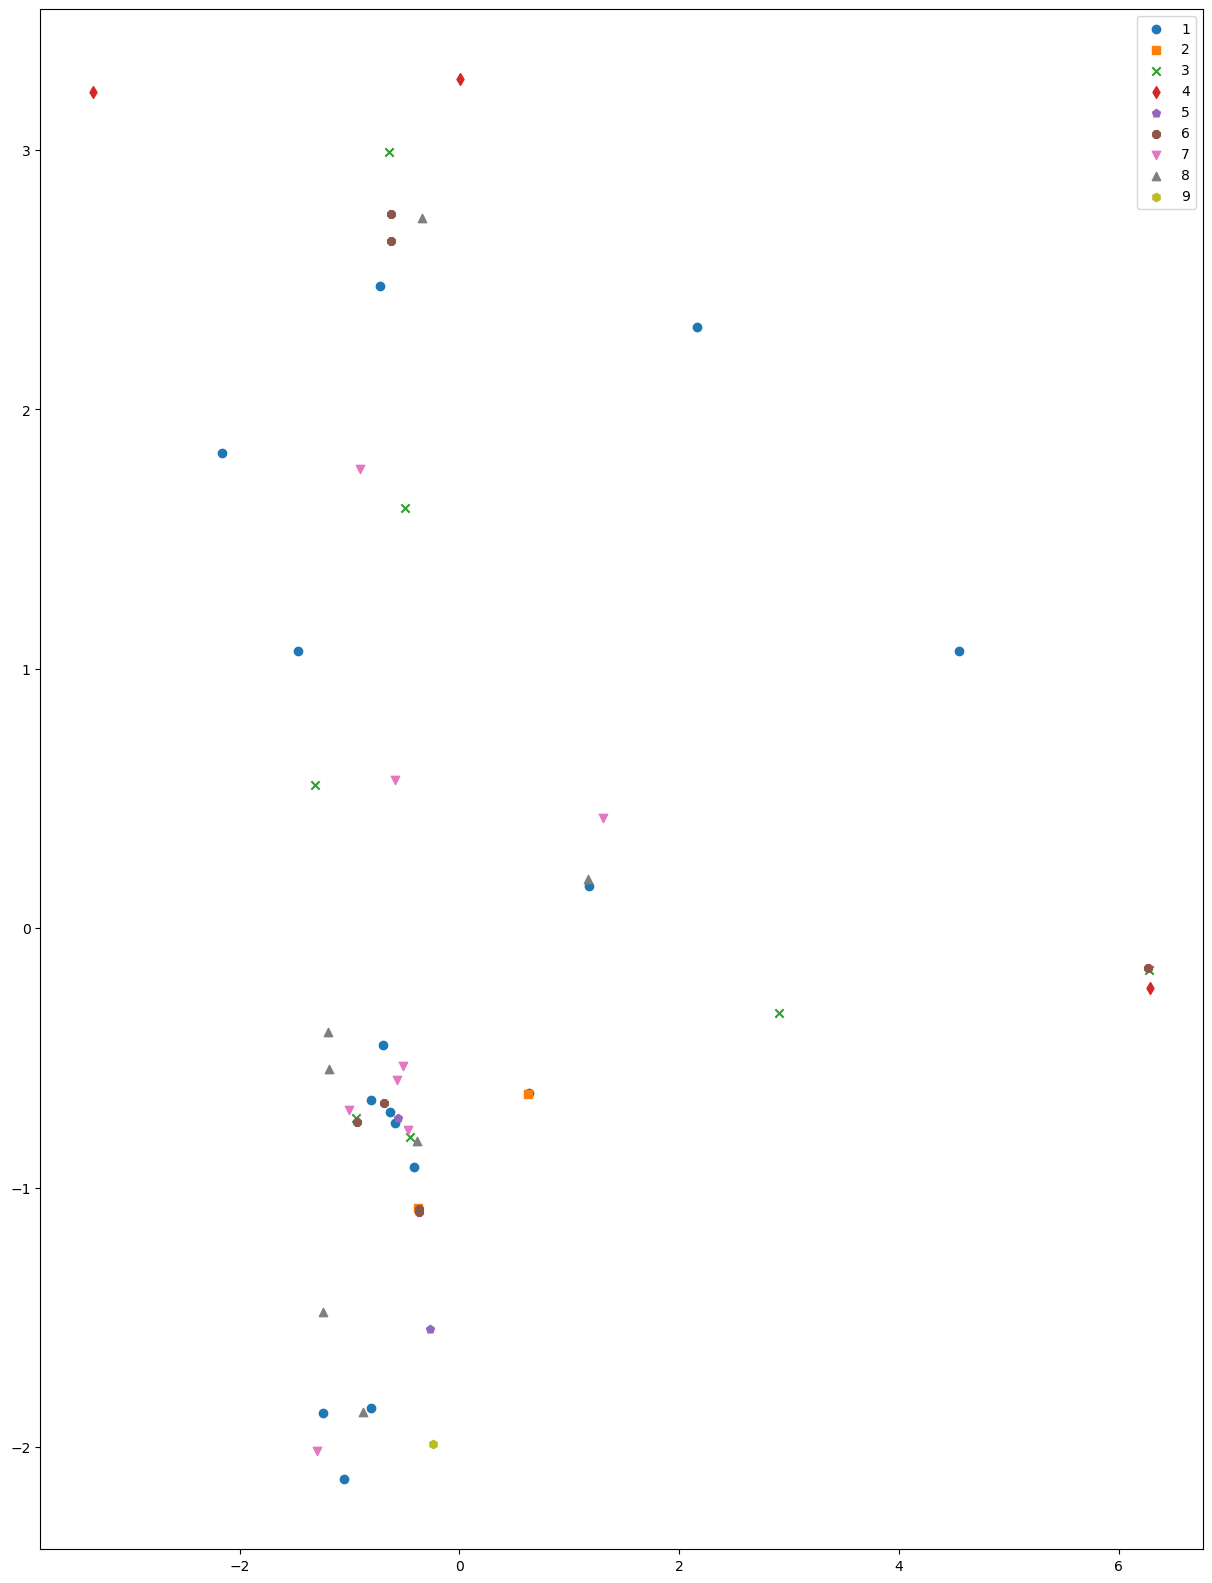

In [42]:
fig=plt.figure(figsize=(15, 20))
for cl, m in zip(np.unique(clusters), 'osxdp8v^h'):
    plt.scatter(pca_x[cl==clusters,0], pca_x[cl==clusters,1], label=cl, marker=m)
    print(f"cl={cl}, {grp.index[cl==clusters].tolist()}")
plt.legend()

In [43]:

within = []
means = []
for cl in np.unique(clusters):
    if cl != 9:
        between=grp.values[cl==clusters].var(axis=0)
        within = []
        for popul in grp.index[cl==clusters].tolist():
            within.append(grp.loc[popul].var())
        within = np.array(within).sum(axis=0)
        ratio=between/within
        print(f"\nCluster: {cl}: {grp.index[cl==clusters].tolist()}")
        arat = np.argsort(-between/within)
        for n, val in zip(np.array(climate)[arat], ratio[arat]):
            print(f"{n: <10}{val:.4}")


Cluster: 1: ['AC23', 'AC32', 'AC34', 'AC36', 'AC37', 'AC38', 'AC39', 'BC14', 'JC43', 'KC44', 'KC47', 'KC63', 'SC59', 'YC5', 'YC9']
T         0.01161
Ann_PREC  0.005151
S         0.004835
R         0.004555
PN        0.0005788
CK        8.326e-05
WK        7.562e-06
U         2.389e-06
IC        1.963e-06
IOE       7.768e-08

Cluster: 2: ['JC42', 'ZC17']
T         0.05699
R         0.01579
S         0.01288
Ann_PREC  0.006913
PN        0.000172
CK        7.099e-05
WK        1.95e-05
IC        1.404e-05
IOE       2.229e-07
U         1.643e-07

Cluster: 3: ['AC24', 'AC25', 'AC27', 'AC31', 'PC49', 'SC60', 'YC7']
T         0.0358
S         0.02184
Ann_PREC  0.01537
R         0.0109
PN        0.0007719
CK        0.00055
WK        2.421e-05
IC        1.187e-05
U         8.723e-06
IOE       1.78e-07

Cluster: 4: ['KC64', 'MC2', 'SC61']
Ann_PREC  0.07338
T         0.04459
R         0.01912
S         0.018
PN        0.01398
CK        0.004409
WK        0.0005786
IC        9.362e-05
U         4.

In [44]:
ratio=between/within
argratio = np.argsort(-between/within)
for n, val in zip(np.array(climate)[argratio], ratio[argratio]):
    print(n, val)

T 0.01997149192572159
R 0.00681593017593877
S 0.0061971406461399405
Ann_PREC 0.002363908848947187
PN 0.00033877853096554673
CK 0.00012038085882613199
U 7.363838703241639e-06
WK 7.29703310465231e-06
IC 2.213531716367621e-06
IOE 7.20285118498616e-08


In [45]:
grp.describe()

,IC,PN,WK,CK,IOE,Ann_PREC,T,U,R,S
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,42.852752,89.499203,34.124877,-137.817210,1.069680,511.306364,1794.292308,71.384615,383.634615,2208.634615
std,6.005538,67.222714,11.604074,38.875349,0.791515,211.420792,409.938533,6.371363,227.592690,263.561879
min,26.265747,-137.972638,-8.769984,-225.588563,0.018813,186.009147,997.600000,58.000000,73.000000,1606.000000
25%,40.654546,58.724413,30.178927,-143.930858,0.623484,376.688299,1586.225000,66.000000,122.000000,1983.000000
50%,43.434320,78.682179,35.999136,-134.201815,0.870438,430.709590,1829.600000,72.000000,426.000000,2249.000000
75%,46.411981,129.481920,38.690385,-126.456005,1.168892,602.044667,2005.125000,74.250000,521.000000,2418.000000
max,55.545315,233.950513,55.132124,-30.838068,3.632345,1150.679022,2668.800000,88.000000,860.000000,2580.000000


### Кластерный анализ по морфологическим признакам

In [46]:
data.head()

,Sp,Region,PLANT_CODE,POPUL_CODE,LAT,LON,ALT,IC,PN,WK,...,Dpl/Lp,Ср.зн S2p3l-S2p4l,Dp,Dvl,Dnl,Dc,Dvns,Dnns,Dvvs,Dnvs
0,Df,Magadanskaya_Mal,A1,MC2,60.38252,151.28287,1000,39.448826,157.45163,11.136081,...,0.356234,0.40,0.3,0.3,0.3,0.3,0.3,0.3,0.1,0.3
1,Df,Magadanskaya_Mal,A2,MC2,60.38252,151.28287,1000,39.448826,157.45163,11.136081,...,0.275556,0.24,0.3,0.3,0.3,0.3,0.3,0.3,0.1,0.3
2,Df,Magadanskaya_Mal,A3,MC2,60.38252,151.28287,1000,39.448826,157.45163,11.136081,...,0.273902,0.34,0.3,0.3,0.3,0.3,0.3,0.3,0.1,0.3
3,Df,Magadanskaya_Mal,A4,MC2,60.38252,151.28287,1000,39.448826,157.45163,11.136081,...,0.355114,0.35,0.3,0.3,0.3,0.3,0.3,0.3,0.1,0.3
4,Df,Magadanskaya_Mal,A5,MC2,60.38252,151.28287,1000,39.448826,157.45163,11.136081,...,0.316384,0.43,0.3,0.3,0.3,0.3,0.3,0.3,0.1,0.3


### Кластеризация по количественным и качественным признакам

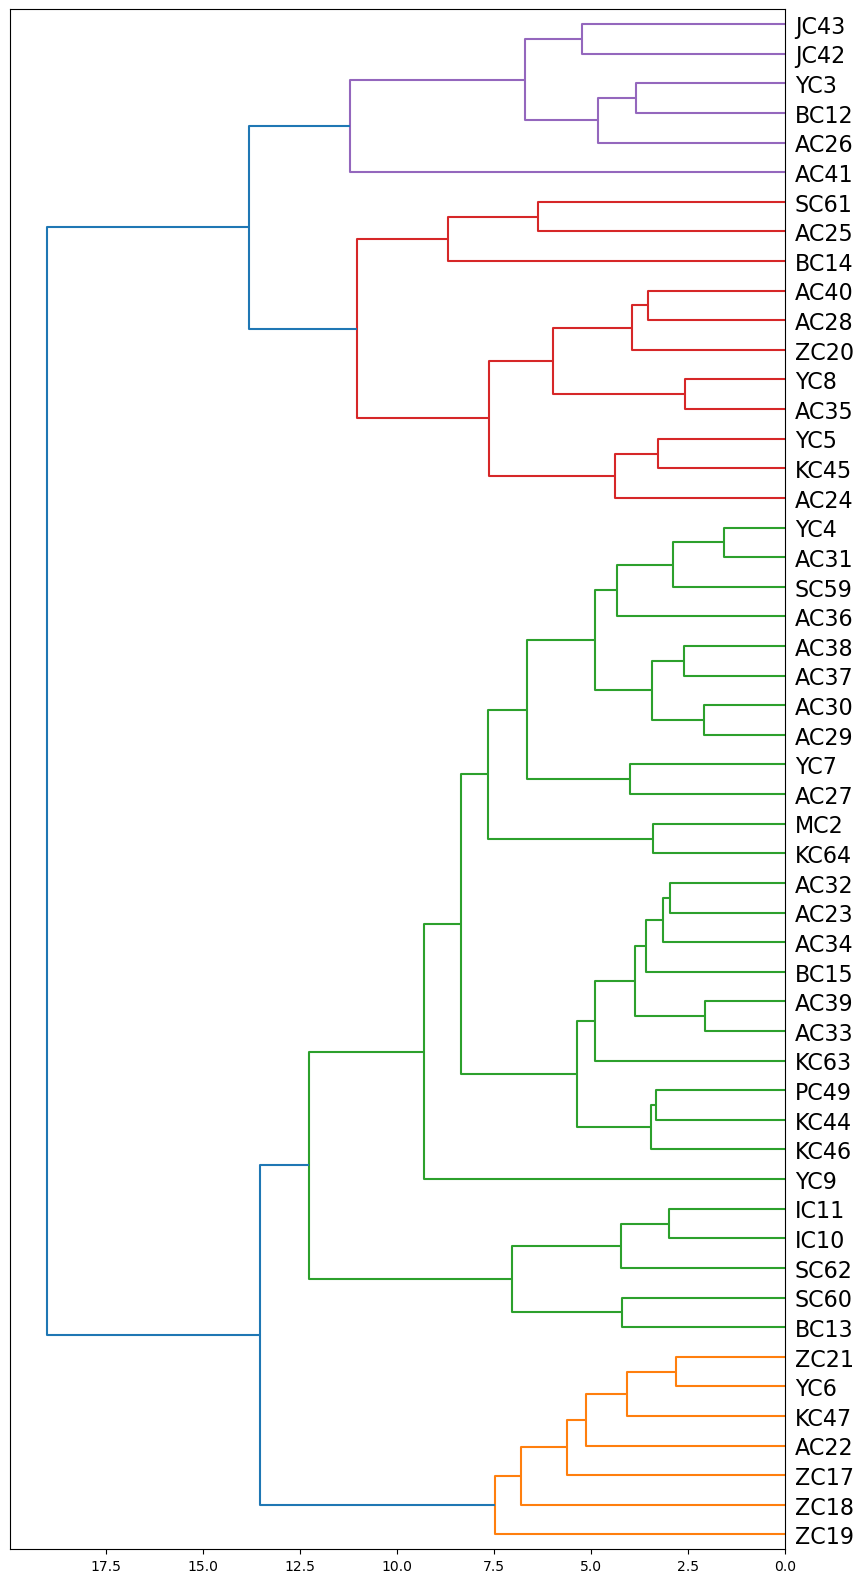

In [47]:
X_data = data.groupby('POPUL_CODE')[morph_qual + morph_quant].mean()
std = StandardScaler()
X_data_ = std.fit_transform(X_data)
ydists = pdist(X_data_)
Z = hierarchy.linkage(ydists, 'ward')
fig=plt.figure(figsize=(10,20))
ax = fig.add_subplot(111)
dn = hierarchy.dendrogram(Z, labels=X_data.index, ax=ax, leaf_font_size=16, orientation='left')
clusters_all = hierarchy.fcluster(Z, 10, criterion='distance')

#### Кластеризация по качественным признакам

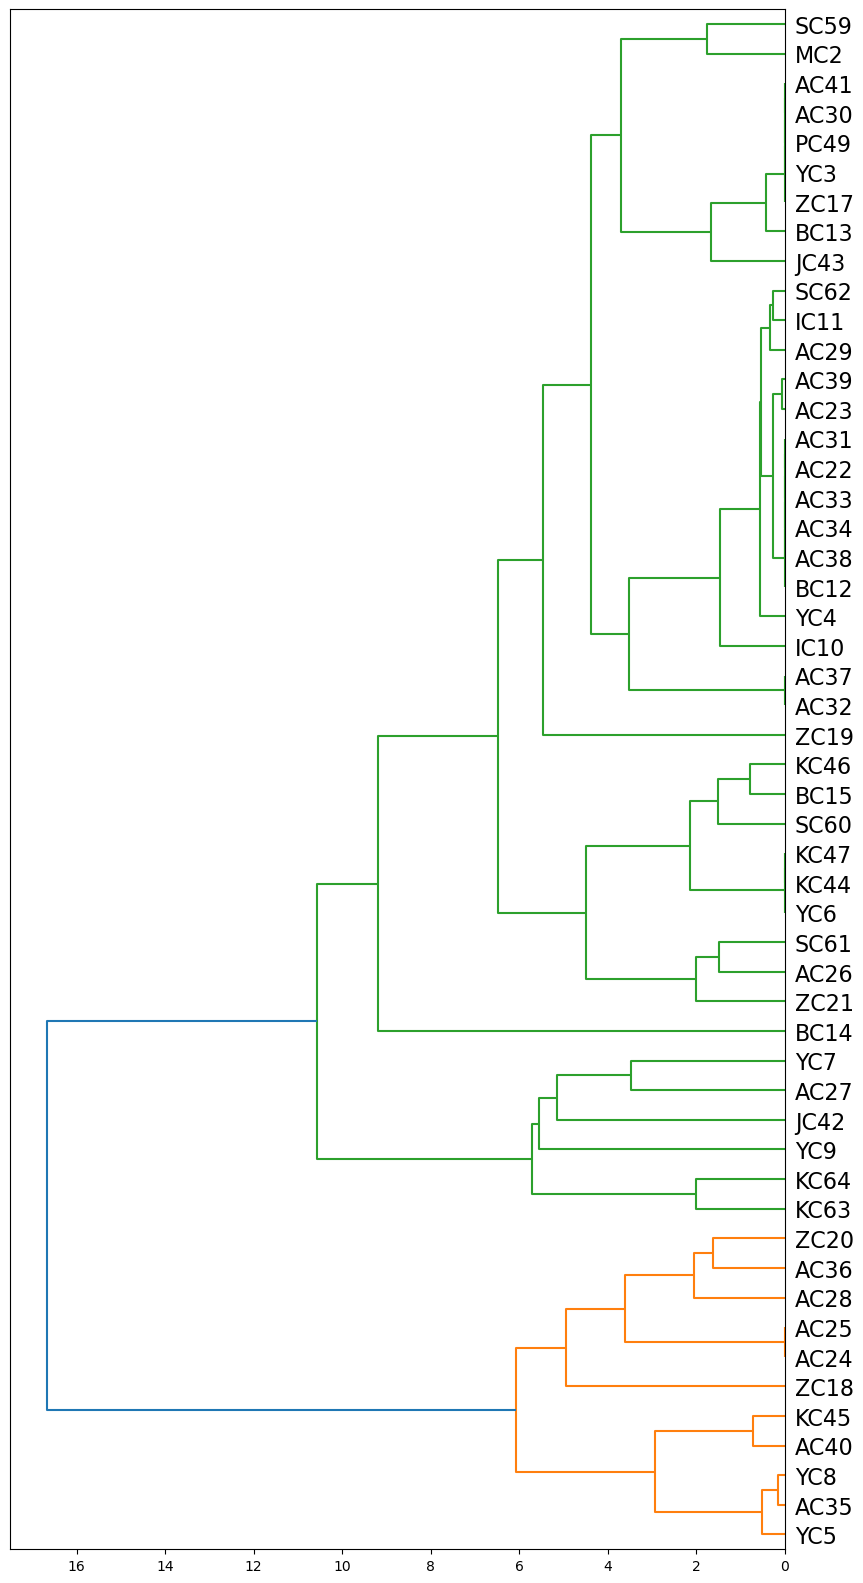

In [48]:
X_data = data.groupby('POPUL_CODE')[morph_qual].mean()
std = StandardScaler()
X_data_ = std.fit_transform(X_data)
ydists = pdist(X_data_)
Z = hierarchy.linkage(ydists, 'ward')
fig=plt.figure(figsize=(10,20))
ax = fig.add_subplot(111)
dn = hierarchy.dendrogram(Z, labels=X_data.index, ax=ax, leaf_font_size=16, orientation='left')
clusters_qual = hierarchy.fcluster(Z, 10, criterion='distance')

# Кластеризация по количественным признакам

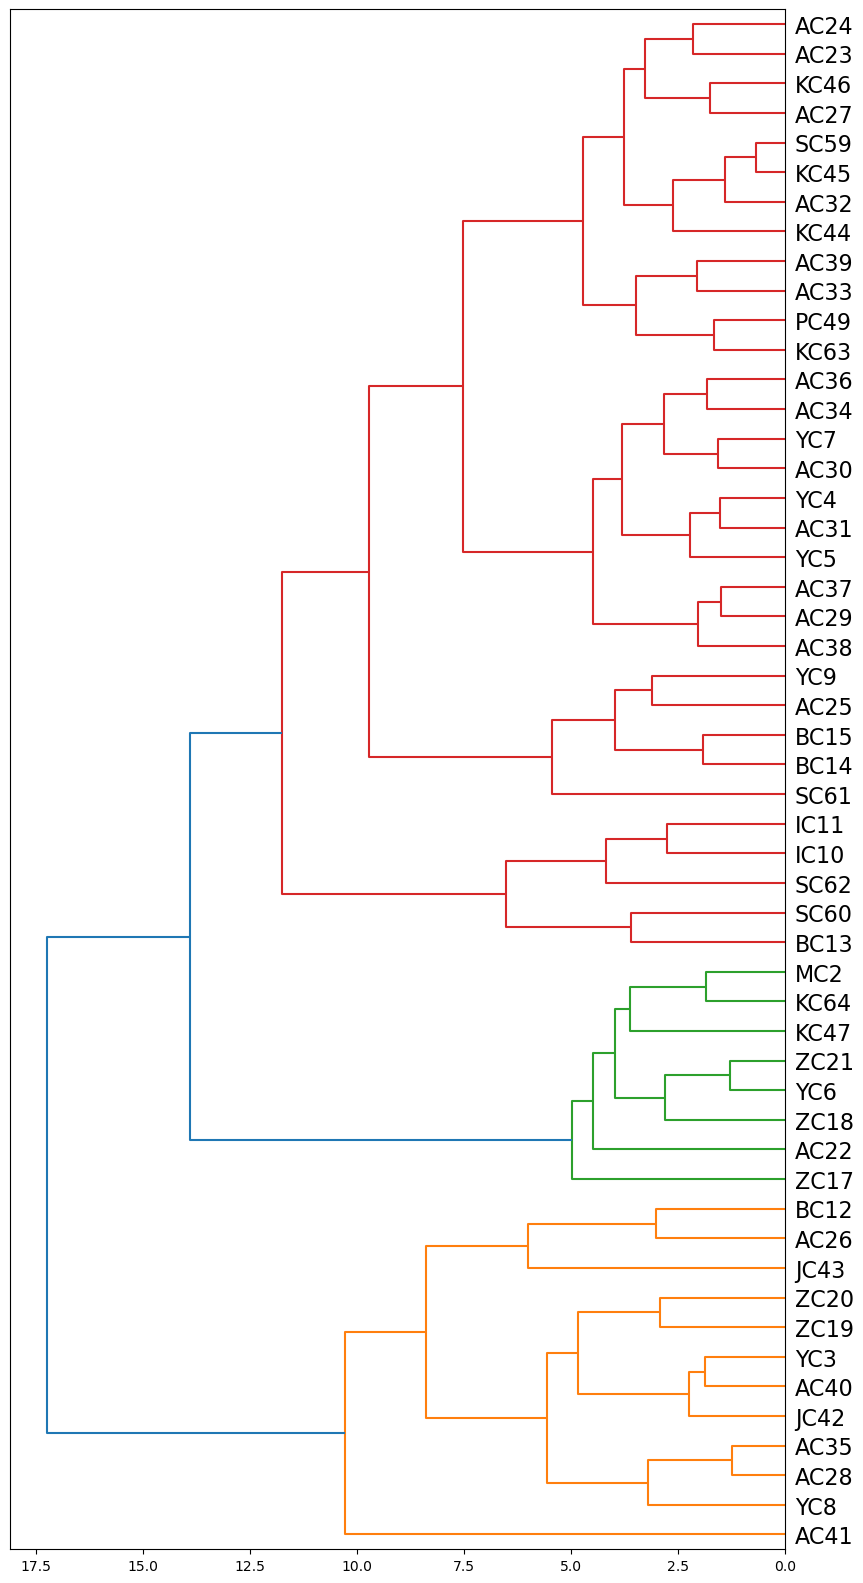

In [49]:
X_data = data.groupby('POPUL_CODE')[morph_quant].mean()
std = StandardScaler()
X_data_ = std.fit_transform(X_data)
ydists = pdist(X_data_)
Z = hierarchy.linkage(ydists, 'ward')
fig=plt.figure(figsize=(10,20))
ax = fig.add_subplot(111)
dn = hierarchy.dendrogram(Z, labels=X_data.index, ax=ax, leaf_font_size=16, orientation='left')
clusters_quant = hierarchy.fcluster(Z, 10, criterion='distance')

In [50]:
from sklearn.metrics import adjusted_rand_score

##### Попарные сравнения классификаций при помощи индекса Рэнда:

In [51]:
adjusted_rand_score(clusters_quant, clusters_qual)


-0.02612685707272839

In [52]:
adjusted_rand_score(clusters_all, clusters_qual)

0.12954377676066736

In [53]:
adjusted_rand_score(clusters_all, clusters_quant)

0.5556385362210605

Тут в общем должно быть понятно, что _all это все признаки, ну и так далее, qual -- это качественные, quant -- это количественные. Чем больше индекс Рэнда, тем более похожи результаты кластеризаций.

In [54]:
from yellowbrick.features.radviz import radviz

ModuleNotFoundError: No module named 'yellowbrick'

In [ ]:
X_data.shape

In [ ]:
X_data_.shape

In [ ]:
X_data = data.groupby('POPUL_CODE')[morph_quant].mean()
std = StandardScaler()
X_data_ = std.fit_transform(X_data)
radviz(X_data, clusters_quant)

In [ ]:
for i in np.unique(clusters_quant):
    print(f"{i}-cluster: {X_data.index[clusters_quant==i]}")

In [ ]:
X_data = data.groupby('POPUL_CODE')[morph_qual].mean()
std = StandardScaler()
X_data_ = std.fit_transform(X_data)
radviz(X_data, clusters_qual)

In [ ]:
for i in np.unique(clusters_qual):
    print(f"{i}-cluster: {X_data.index[clusters_qual==i]}")

In [ ]:
X_data = data.groupby('POPUL_CODE')[morph_qual+morph_quant].mean()
std = StandardScaler()
X_data_ = std.fit_transform(X_data)
radviz(X_data, clusters_all)

In [ ]:
for i in np.unique(clusters_all):
    print(f"{i}-cluster: {X_data.index[clusters_all==i]}")

### PCA по количественным и качественным признакам для групп

In [ ]:
std = StandardScaler()
df = data.groupby('POPUL_CODE')[morph_qual+morph_quant].mean()
X_data = std.fit_transform(df)
pca = PCA(n_components=2)
pca.fit(X_data)
X_trans = pca.transform(X_data)
plt.scatter(X_trans[:,0], X_trans[:, 1])

In [ ]:
std = StandardScaler()
df = data.groupby('POPUL_CODE')[morph_quant].mean()
X_data = std.fit_transform(df)
pca = PCA(n_components=2)
pca.fit(X_data)
X_trans = pca.transform(X_data)
plt.scatter(X_trans[:,0], X_trans[:, 1])

In [ ]:
std = StandardScaler()
df = data.groupby('POPUL_CODE')[morph_qual].mean()
X_data = std.fit_transform(df)
pca = PCA(n_components=2)
pca.fit(X_data)
X_trans = pca.transform(X_data)
plt.scatter(X_trans[:,0], X_trans[:, 1])

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from matplotlib.lines import Line2D

In [ ]:
%matplotlib notebook

In [ ]:
std = StandardScaler()
df = data.loc[:, morph_qual+morph_quant+['POPUL_CODE']].copy()
X_data = std.fit_transform(df.loc[:, morph_qual + morph_quant])
lda = LinearDiscriminantAnalysis(n_components=2)

la = LabelEncoder()
la.fit(df.POPUL_CODE)
lda.fit(X_data, la.transform(df.POPUL_CODE))
X_trans = lda.transform(X_data)


unfilled_markers = [m for m, func in Line2D.markers.items() if func != 'nothing' and m not in Line2D.filled_markers]


e = np.zeros((1, X_data.shape[1]))
arrows = []
for k in range(X_data.shape[1]):
    ek = e.copy()
    ek[0, k] = 1.0
    (dx, dy) = lda.transform(ek)[0]
    arrows.append([dx**2 + dy**2, k])
    
arrows = sorted(arrows, key=lambda x: x[0], reverse=True)


for ind, cl in enumerate(np.unique(df.POPUL_CODE)):
    x1, x2 = X_trans[df.POPUL_CODE==cl,0], X_trans[df.POPUL_CODE==cl, 1]
    plt.scatter(x1, x2, marker=unfilled_markers[ind % 21], label=cl)

    for k in map(lambda x: x[1], arrows[:5]):
        ek = e.copy()
        ek[0, k] = 1.0
        dx, dy = lda.transform(ek)[0]
        plt.gca().annotate("",
                xy=(dx-5, dy-10), xycoords='data',
                xytext=(-5, -10.0), textcoords='data',
                arrowprops=dict(arrowstyle="->",
                                connectionstyle="arc3"),
            )
        plt.gca().annotate(f"{(morph_qual + morph_quant)[k]}",
                xy=(dx-5, dy-10), xycoords='data')
plt.legend()

In [ ]:
def combine_popluations(population_code):
    if population_code == 'MC2':
        return "MG"  # Магаданская
    elif population_code in [f"YC{_}" for _ in range(3, 10)]:
        return "YA"  # Якутская
    elif population_code in ["IC10", "IC11"]:
        return "IR"  # Иркутская
    elif population_code in [f"BC{_}" for _ in range(12, 16)]:
        return "BU"  # Бурятская
    elif population_code in [f"ZC{_}" for _ in range(17, 22)]:
        return "ZB"  # Забайкальская
    elif population_code in [f"AC{_}" for _ in range(22, 42)]:
        return "AM"  # Амурская
    elif population_code in ["JC42", "JC43"]:
        return "EV"  # Еврейская
    elif population_code in [f"KC{_}" for _ in range(44, 48)]:
        return "KH"  # Хабаровская
    elif population_code=="PC49":
        return "PR"  # Приморская
    elif population_code in [f"SC{_}" for _ in range(59, 63)]:
        return "SA"  # Сахалинская
    else:
        return "KA"  # Камчатская 

In [ ]:
df_old = df.copy()




In [ ]:
df=df_old.copy()
df.POPUL_CODE = df.POPUL_CODE.map(combine_popluations)


In [ ]:
Counter(df.POPUL_CODE)

In [ ]:
%matplotlib notebook

In [ ]:
std = StandardScaler()
#df = data.loc[:, morph_qual+morph_quant+['POPUL_CODE']].copy()
X_data = std.fit_transform(df.loc[:, morph_qual + morph_quant])
lda = LinearDiscriminantAnalysis(n_components=2)

la = LabelEncoder()
la.fit(df.POPUL_CODE)
lda.fit(X_data, la.transform(df.POPUL_CODE))
X_trans = lda.transform(X_data)


unfilled_markers = [m for m, func in Line2D.markers.items() if func != 'nothing' and m not in Line2D.filled_markers]


e = np.zeros((1, X_data.shape[1]))
arrows = []
for k in range(X_data.shape[1]):
    ek = e.copy()
    ek[0, k] = 1.0
    (dx, dy) = lda.transform(ek)[0]
    arrows.append([dx**2 + dy**2, k])
    
arrows = sorted(arrows, key=lambda x: x[0], reverse=True)


for ind, cl in enumerate(np.unique(df.POPUL_CODE)):
    x1, x2 = X_trans[df.POPUL_CODE==cl,0], X_trans[df.POPUL_CODE==cl, 1]
    plt.scatter(x1, x2, marker=unfilled_markers[ind % 21], label=cl)

for k in map(lambda x: x[1], arrows[:5]):
    ek = e.copy()
    ek[0, k] = 1.0
    dx, dy = lda.transform(ek)[0]
    plt.gca().annotate("",
            xy=(dx, dy), xycoords='data',
            xytext=(0, 0.0), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
        )
    plt.gca().annotate(f"{(morph_qual + morph_quant)[k]}",
            xy=(dx, dy), xycoords='data')
plt.legend()


In [ ]:
plt.show()

In [ ]:
lda.explained_variance_ratio_

In [ ]:
plt.gcf().savefig("output.png", dpi=600)